# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing Necessary Libraries

In [1]:
# Suppressing warnings
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

# Libraries for numerical calculations and data manipulations
import numpy as np
import pandas as pd

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for statistical works
import scipy.stats as stats
import statsmodels.stats.api as sms

# Libraries for supervised leaning
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Setting the background theme and font scale for figures
sns.set_theme(style = 'darkgrid', font_scale = 1.15)

# To restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Loading the Dataset

In [3]:
# Loading the dataset
data_orig = pd.read_csv('/content/drive/MyDrive/Python_files/used_device_data.csv')
# Ensuring the original data remains untouched
df = data_orig.copy()

# Peeking the first seven rows
df.head(7)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.500,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,2020,127,4.308,4.715
1,Honor,Android,17.300,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,2020,325,5.162,5.519
2,Honor,Android,16.690,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,2020,162,5.111,5.885
3,Honor,Android,25.500,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,2020,345,5.135,5.631
4,Honor,Android,15.320,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,2020,293,4.390,4.948
5,Honor,Android,16.230,yes,no,13.000,8.000,64.000,4.000,4000.000,176.000,2020,223,4.414,5.061
6,Honor,Android,13.840,yes,no,8.000,5.000,32.000,2.000,3020.000,144.000,2020,234,3.878,4.519


In [4]:
# Peeking the last seven rows
df.tail(7)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3447,Apple,iOS,15.270,yes,no,8.000,7.000,64.000,4.000,3110.000,194.000,2019,208,5.101,6.288
3448,Asus,Android,16.740,yes,no,NaN,24.000,128.000,8.000,6000.000,240.000,2019,325,5.715,7.059
3449,Asus,Android,15.340,yes,no,NaN,8.000,64.000,6.000,5000.000,190.000,2019,232,4.492,6.484
3450,Asus,Android,15.240,yes,no,13.000,8.000,128.000,8.000,4000.000,200.000,2018,541,5.038,6.252
3451,Alcatel,Android,15.800,yes,no,13.000,5.000,32.000,3.000,4000.000,165.000,2020,201,4.357,4.529
3452,Alcatel,Android,15.800,yes,no,13.000,5.000,32.000,2.000,4000.000,160.000,2020,149,4.350,4.624
3453,Alcatel,Android,12.830,yes,no,13.000,5.000,16.000,2.000,4000.000,168.000,2020,176,4.132,4.280


## Data Overview

*   Observations
*   Sanity checks

### Checking the Shape of the Dataset

In [5]:
print('The dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataset has 3454 rows and 15 columns.


### Checking the data types and general info of data columns


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Observations:


*   Dataset has 3454 entries, each with 15 features (columns). Each row corresponds to a distinct used phone/tablet. 
*   There are four categorical variables (the brand name, Operating System on the device, and 4G and 5G--whether 4G and 5G technologies are available on a device), and the rest of the columns are numerical variables. There is no inconsisitency here, and the features that are expected to be numerical (e.g., price, RAM, weight, days used, etc.) are in fact either in float or integer. The same goes for categorical variables as well.
*   Several columns (6 to be exact) show null (missing) values. This will be inspected in detail in the future steps.





### Statistical Summary of the Dataset

In [7]:
# Numerical columns
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.000,13.713,3.805,5.080,12.700,12.830,15.340,30.710
main_camera_mp,3275.000,9.460,4.815,0.080,5.000,8.000,13.000,48.000
selfie_camera_mp,3452.000,6.554,6.970,0.000,2.000,5.000,8.000,32.000
int_memory,3450.000,54.573,84.972,0.010,16.000,32.000,64.000,1024.000
ram,3450.000,4.036,1.365,0.020,4.000,4.000,4.000,12.000
battery,3448.000,3133.403,1299.683,500.000,2100.000,3000.000,4000.000,9720.000
weight,3447.000,182.752,88.413,69.000,142.000,160.000,185.000,855.000
release_year,3454.000,2015.965,2.298,2013.000,2014.000,2015.500,2018.000,2020.000
days_used,3454.000,674.870,248.580,91.000,533.500,690.500,868.750,1094.000
normalized_used_price,3454.000,4.365,0.589,1.537,4.034,4.405,4.756,6.619


In [8]:
# Categorical columns
df.describe(include = ['object', 'category']).T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


### Observations:


***Numerical Variables:***

*   ***Screen size*** has quite a large spread varying from ~ 5 cm to ~ 31 cm, and a std about 25% of the mean. This is expected, since the devices can be either a cell phone or a tablet. Its mean and median are relatively close.
*   ***MPs of main and selfie cameras*** also have large ranges. The std of the former is ~50% of the mean and the std of the latter is slightly larger than the mean. Minimum value of the selfie camera's MP is 0, perhaps because some devices have no selfie camera.
*   ***Internal memory*** has a very large range, varying from 0.01 GB to 1024 GB, with a mean and median much closer to minimum, suggesting the right-skewedness of the distribution.
*   Although ***RAM*** also has a wide spread, the most frequent value appears to be 4 GB, evidenced by it being all 25th, 50th and 75th percentiles of the distribution. The mean is also very close to 4 GB and std is just 1/3 of the mean.
*   ***Battery's energy capacity*** varies from 500 mAh to 9720 mAh, with its median and mean being close to each other and around 3000 mAh.
*   Devices ***weigh*** quite differently, varying from 69 g to the outstanding 855 g, which is anticipated as the batch contains both cell phones and tablets. The median and mean fall at 160 g and around 180 g, respectively, suggesting a right-skewed distribution. 
*   Devices have been ***released*** from 2013 to 2020 with the median and mean falling at 2015.5 and almost 2016. 
*   The number of ***days the devices have been used*** varies significantly from almost 3 months to almost three years. Most devices have been used for 2 years or less.
*   Based on the proximity of the mean and median, and the fact that they fall relatively in the middle of min and max values, we can speculate that both ***normalized new and used prices*** have fairly normal distributions with little to no skewnewss. This will be veriefied in the EDA section. They both have fairly small stds (~13% of their mean values) and the new phones/tablets are on average 20% more expensive.

***Categorical variables:***


*   There are 34 unique ***brands*** of phones/tablets, with 'Others' being the most frequent one.
*   There are four types of ***Operating System*** on the devices, with more than 90% of them being Android.
*   Almost 2/3 of devices have ***4G*** available, while less than 5% of them has ***5G*** capacity.




### Checking on Duplicate and Missing Values:

In [9]:
print('Dataset has {} duplicated entries.'.format(df.duplicated().sum()))
print('\nMissing values across different columns:')
df.isnull().sum()

Dataset has 0 duplicated entries.

Missing values across different columns:


brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

### Observations:

The dataset has no duplicated rows, but in 6 columns (most noticeably the MP of main camera) it has missing values. We will do a thorough EDA before deciding what to do about the missing values.

## Exploratory Data Analysis (EDA)


In the following EDA, we aim to address the questions asked below, but the EDA will be far more comprehensive than merely answering the questions.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [10]:
# Function for annotating the bars in a countplot
def countplot_labeling(cntplt, data, perc = True):
  ''' This function gets a countplot and the dataset that has generated
  the plot to produce the values corresponding to each bar (category).
  If perc = True, percentages will be shown.'''

  total = data.shape[0]  # total number of values in the dataset
  for p in cntplt.patches:
        if perc == True:
          # percentage of each category
          label = "{:.1f}%".format(100*p.get_height()/total)
        else:
          label = round(p.get_height(),1)  # count of each category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        # annotate the bar
        cntplt.annotate(label, (x, y), ha = "center", va = "center", size=12, xytext=(0, 5), textcoords = "offset points")  

### Univariate Analysis

**`Brand Name`**

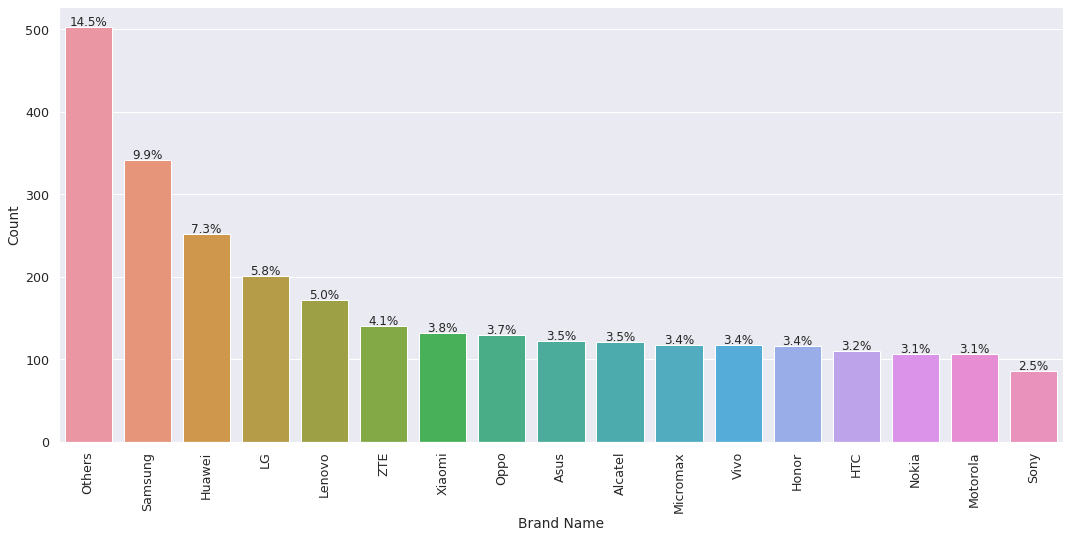

In [11]:
# Plotting the frequency of brand names (for the sake of better visualization only haf are shown)

plt.figure(figsize = (18, 8));
cntplt = sns.countplot(data = df, x = 'brand_name', order = df['brand_name'].value_counts(ascending = False).index.tolist()[0:17]);
countplot_labeling(cntplt, df)
plt.xticks(rotation = 90);
plt.xlabel('Brand Name');
plt.ylabel('Count');

**`OS`**

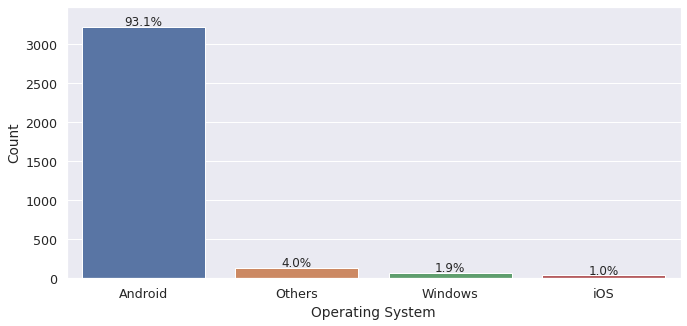

In [12]:
# Plotting the frequency of OS of the devices 

plt.figure(figsize = (11, 5));
cntplt = sns.countplot(data = df, x = 'os', order = df['os'].value_counts(ascending = False).index.tolist());
countplot_labeling(cntplt, df)
plt.xlabel('Operating System');
plt.ylabel('Count');
plt.ylim(0, 3480);

**`4G & 5G`**

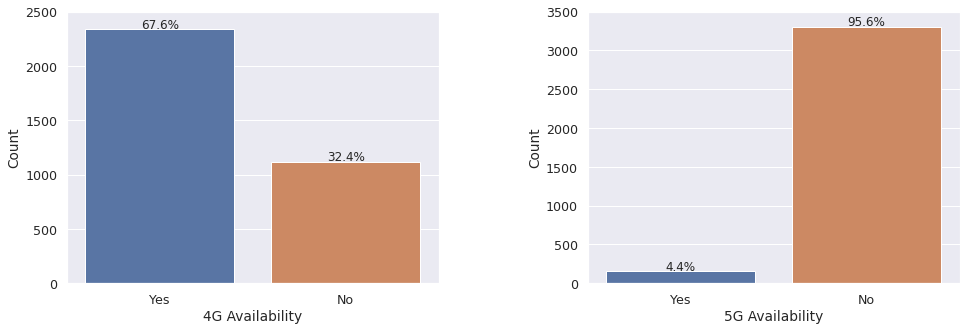

In [13]:
# Plotting the frequency of 4G and 5G availabilities of the devices 

plt.figure(figsize = (16, 5));
plt.subplot(121)
cntplt = sns.countplot(data = df, x = '4g', order = ['yes', 'no']);
countplot_labeling(cntplt, df)
cntplt.set_xticklabels(['Yes', 'No']);
plt.xlabel('4G Availability');
plt.ylabel('Count');
plt.ylim(0, 2500);
plt.subplot(122)
cntplt = sns.countplot(data = df, x = '5g', order = ['yes', 'no']);
countplot_labeling(cntplt, df)
cntplt.set_xticklabels(['Yes', 'No']);
plt.xlabel('5G Availability');
plt.ylabel('Count');
plt.ylim(0, 3500);
plt.subplots_adjust(wspace=0.4, hspace = 2)

**`Release Year`**

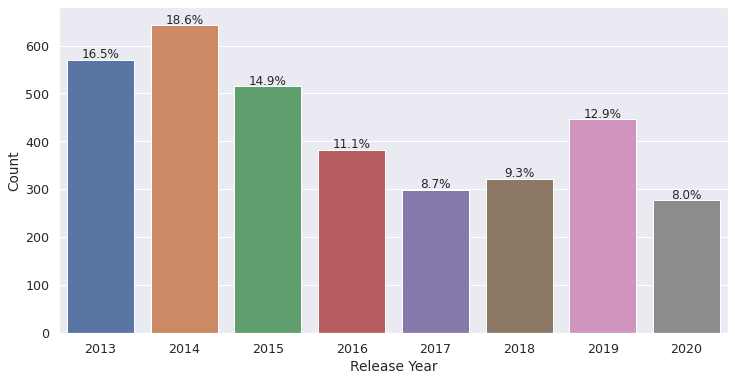

In [14]:
# Plotting the frequency of 4G and 5G availabilities of the devices 

plt.figure(figsize = (12, 6));
cntplt = sns.countplot(data = df, x = 'release_year');
countplot_labeling(cntplt, df)
plt.xlabel('Release Year');
plt.ylabel('Count');
plt.ylim(0, 680);

#### Observations from the Univariate Analysis of Categorical Variables:



*   The most frequent ***brand*** type is ‘Others’, as the brand of 14.5% of devices is unlabeled.  After that, Samsung, Huawei and LG are the most popular brands. Note that only half the brands have been shown due to visualization considerations. Each of the 9 least popular brands makes up less than 1% of the devices individually.

*   Phones/tablets with Android ***Operating System*** have largely dominated the market, composing 93.1% of all devices in the batch.

*   More than 2/3 of devices have ***4G*** technology available, while only 4.4% of them support ***5G***. However 4G and 5G plots have been shown in two different panels of the same figure to save space, the panels are fully separate from one another, and each demonstrates a univariate analysis.

*   As anticipated, devices with older **release years** are more present in the batch, so that phones/tablets from 2013 to 2015 make up 50% of all devices. Although release year is a numerical variable, assuming it to be a categorical one and displaying its barplot, to my discretion, would reveal more information. 



**`Screen Size`**

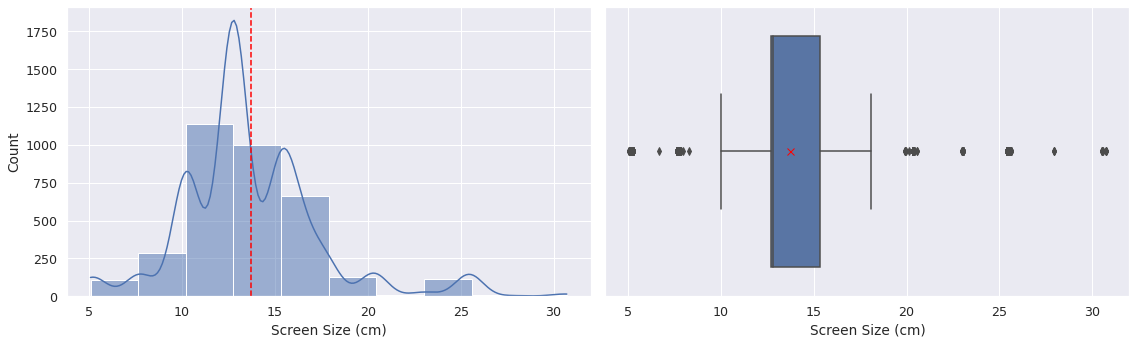

In [15]:
# Plotting the distribution of phones' screen size 

# mean value
mv = df['screen_size'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'screen_size', kde = True, bins = 10);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Screen Size (cm)')
plt.subplot(122)
sns.boxplot(data = df, x = 'screen_size', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Screen Size (cm)')
plt.tight_layout()

**`Main Camera (MP)`**

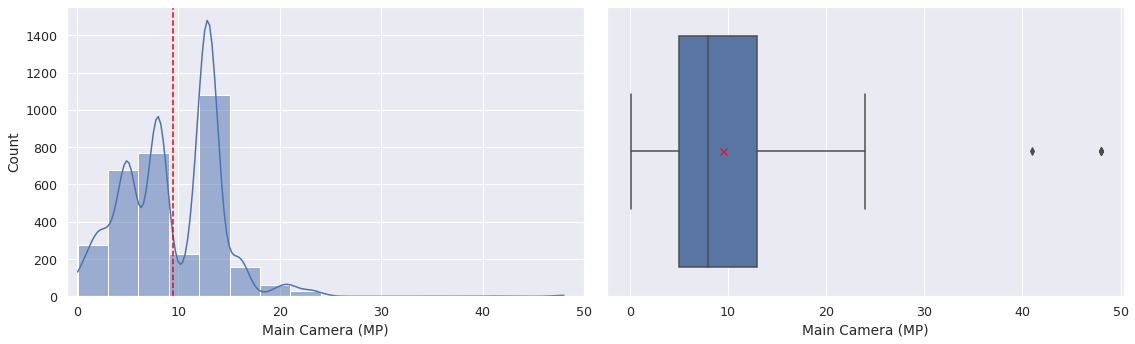

In [16]:
# Plotting the distribution of the main cameras' megapixel

# mean value
mv = df['main_camera_mp'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'main_camera_mp', kde = True, bins = 16);
plt.xlim(-1, 50)
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Main Camera (MP)')
plt.subplot(122)
sns.boxplot(data = df, x = 'main_camera_mp', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Main Camera (MP)')
plt.tight_layout()

**`Selfie Camera (MP)`**

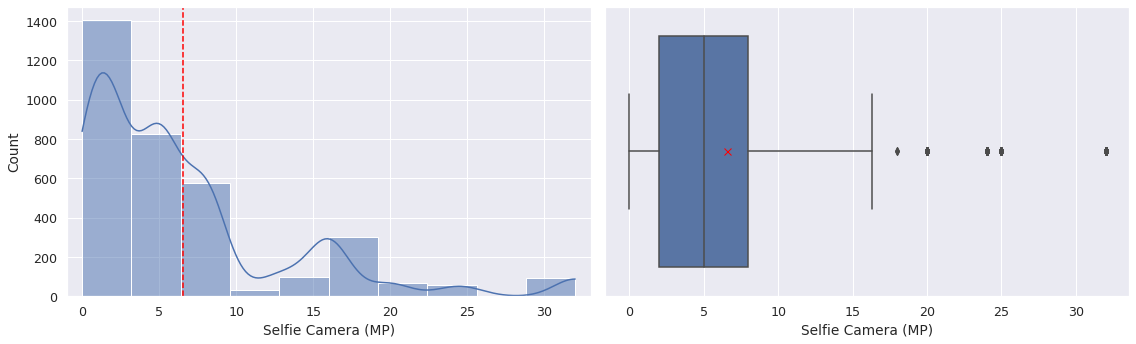

In [17]:
# Plotting the distribution of the selfie cameras' megapixel

# mean value
mv = df['selfie_camera_mp'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'selfie_camera_mp', kde = True, bins = 10);
plt.xlim(-1, 33)
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Selfie Camera (MP)')
plt.subplot(122)
sns.boxplot(data = df, x = 'selfie_camera_mp', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Selfie Camera (MP)')
plt.tight_layout()

**`Internal Memory`**

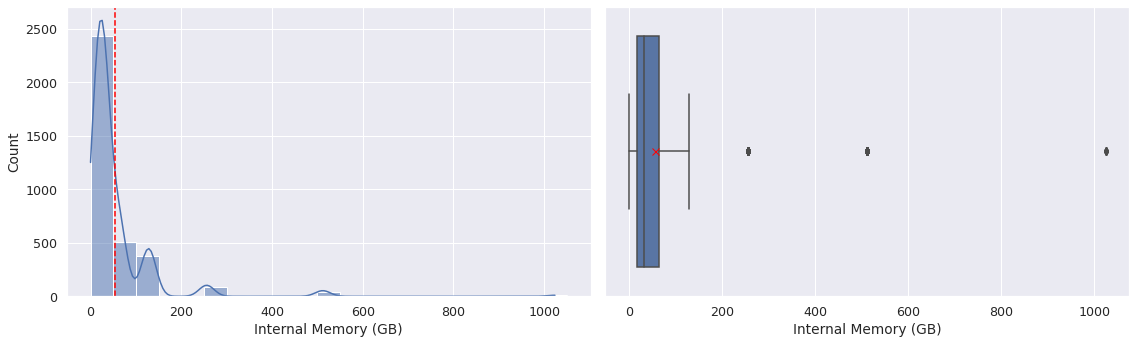

In [18]:
# Plotting the distribution of the internal memory (GB)

# mean value
mv = df['int_memory'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'int_memory', kde = True, binwidth = 50);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Internal Memory (GB)')
plt.subplot(122)
sns.boxplot(data = df, x = 'int_memory', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Internal Memory (GB)')
plt.tight_layout()

**`RAM`**

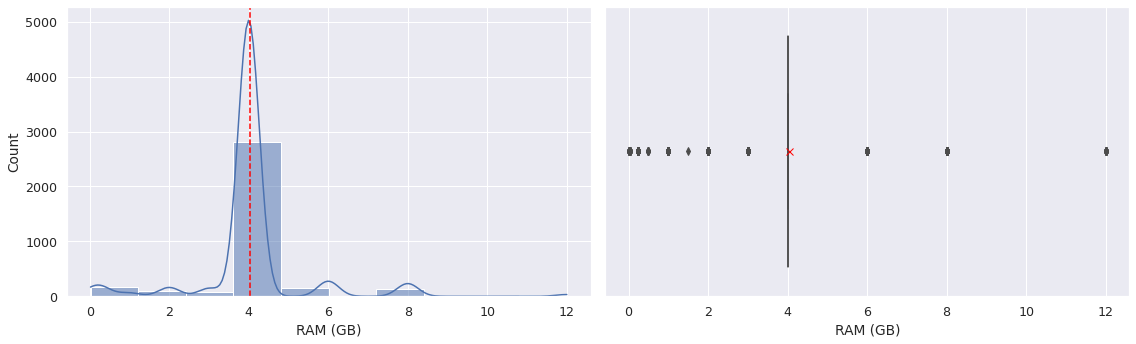

In [19]:
# Plotting the distribution of RAM capacity (GB)

# mean value
mv = df['ram'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'ram', kde = True, bins = 10);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('RAM (GB)')
plt.subplot(122)
sns.boxplot(data = df, x = 'ram', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('RAM (GB)')
plt.tight_layout()

**`Battery`**

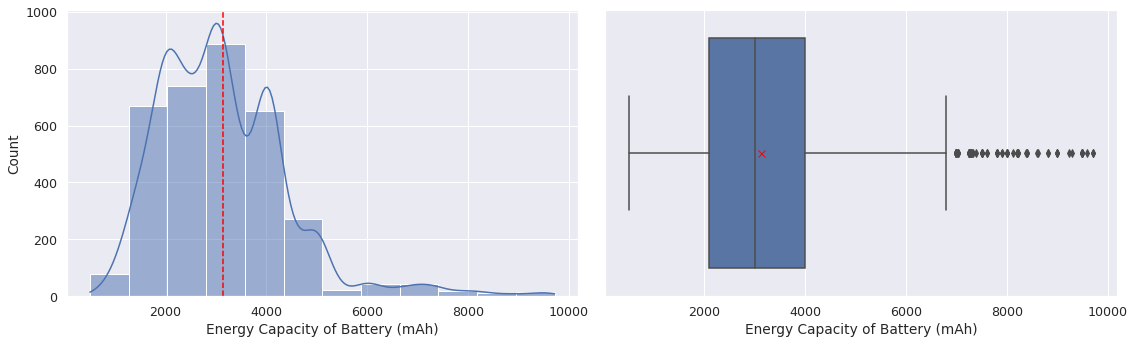

In [20]:
# Plotting the distribution of the energy capacity of devices' batteries (mAh)

# mean value
mv = df['battery'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'battery', kde = True, bins = 12);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Energy Capacity of Battery (mAh)')
plt.subplot(122)
sns.boxplot(data = df, x = 'battery', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Energy Capacity of Battery (mAh)')
plt.tight_layout()

**`Weight`**

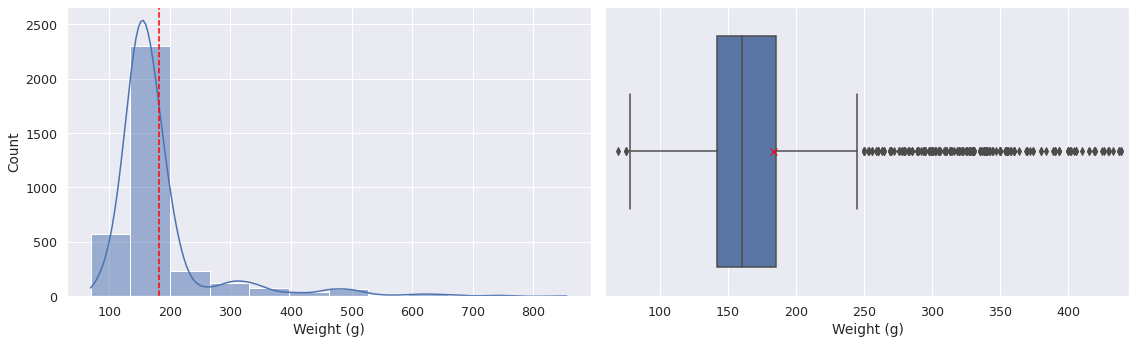

In [21]:
# Plotting the distribution of device weights (grams)

# mean value
mv = df['weight'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'weight', kde = True, bins = 12);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Weight (g)')
plt.subplot(122)
sns.boxplot(data = df, x = 'weight', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Weight (g)')
plt.xlim(60, 445)  # To make the main portion of the boxplot more visible, outliers above 445 haven't been shown
plt.tight_layout()

**`Days Used`**

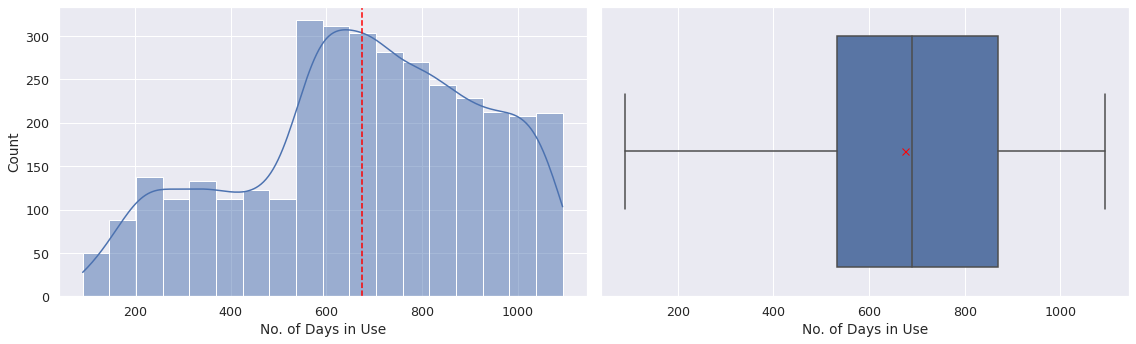

In [22]:
# Plotting the distribution of the number of days the phones have been used

# mean value
mv = df['days_used'].mean()

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'days_used', kde = True, bins = 18);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('No. of Days in Use')
plt.subplot(122)
sns.boxplot(data = df, x = 'days_used', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('No. of Days in Use')
plt.tight_layout()

**`New Price`**

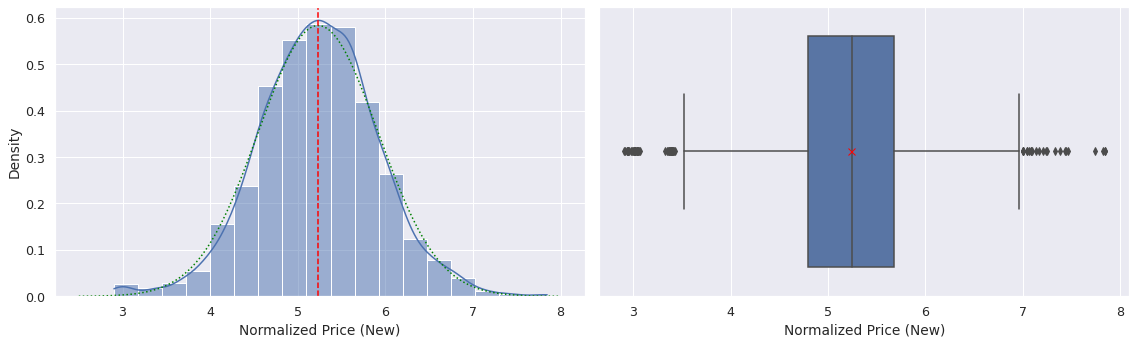

In [23]:
# Plotting the distribution of the normalized prices of the new devices of the same model

# mean value
mv = df['normalized_new_price'].mean()

# Generating the idealized normal distribution
x_dist = np.linspace(2.5, 8, 1000)
ideal_norm_dist = stats.norm.pdf(x_dist, loc = mv, scale = df['normalized_new_price'].std(ddof = 1))

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'normalized_new_price', kde = True, bins = 18, stat = 'density');
plt.plot(x_dist, ideal_norm_dist, color = 'green', linestyle = ':');
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Normalized Price (New)')
plt.subplot(122)
sns.boxplot(data = df, x = 'normalized_new_price', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Normalized Price (New)')
plt.tight_layout()

**`Used Price`**

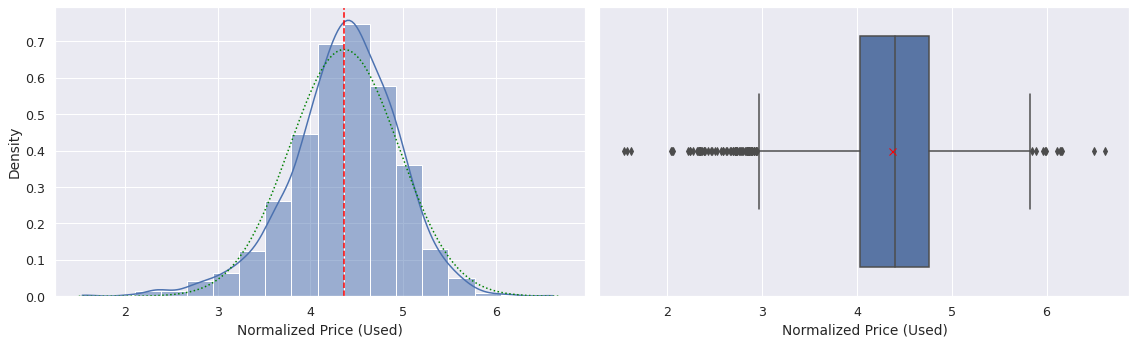

In [24]:
# Plotting the distribution of the normalized prices of the used devices

# mean value
mv = df['normalized_used_price'].mean()

# Generating the idealized normal distribution
x_dist = np.linspace(1.5, 6.7, 1000)
ideal_norm_dist = stats.norm.pdf(x_dist, loc = mv, scale = df['normalized_used_price'].std(ddof = 1))

plt.figure(figsize = (16, 5));
plt.subplot(121)
sns.histplot(data = df, x = 'normalized_used_price', kde = True, bins = 18, stat = 'density');
plt.plot(x_dist, ideal_norm_dist, color = 'green', linestyle = ':');
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Normalized Price (Used)')
plt.subplot(122)
sns.boxplot(data = df, x = 'normalized_used_price', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Normalized Price (Used)')
plt.tight_layout()

#### Observations from the Univariate Analysis of Numerical Variables:



*   Note that in all distribution plots, the red dashed lines and crosses indicate the mean values.

*   Since the ***screen sizes*** take discrete values, their distribution doesn’t look very smooth. Another reason for this form of distribution is the separation between the size of phones and tablets. In general, most screen sizes reside between 10 cm to 17.5 cm, with their median and mean falling almost at 12.8 cm and 13.7, respectively. The screen size distribution is fairly right-skewed, revealing several outliers on both sides of the boxplot.

*   Similar to the screen size, the values the resolution of ***main and selfie cameras*** take are fairly discrete, rendering their KDE plots somewhat rugged. Regardless, they both have right-skewed distributions. The quality of main cameras is on average somewhat better with its median falling at 8 MP, compared to that of selfie cameras which is equal to 5 MP. The mean values of main and selfie cameras are around 9.5 MP and 6.5 MP, respectively.

*   The ***internal memory*** of devices has a very right-skewed distribution, with 50% of phones/tablets have a ROM of 32 GB or less. There are of course devices with much more internal memory as well, e.g., a few outliers have ROMs larger than 200 GB, pushing the mean to be greater than median (~ 55 GB).

*   The boxplot of ***RAMs*** is reduced to a line, since more than 80% of devices have a 4GB RAM. The mean value of RAM is also almost equal to 4GB, and their histogram distribution is relatively centered around this value, as well.

*   The ***energy capacity of device batteries*** has a right-skewed distribution, with median and mean falling around 3000 mAh, while exhibiting many outliers to the right of the boxplot, with maximum being 9720 mAh.  

*   The distribution of ***device weights*** is highly right-skewed, with median and mean appearing at 160 g almost 180 g, respectively. There are many outliers on the right side of the boxplot, weighing ~250 g or much more, and only a few on the left. One reason for the right-skewed distribution is the presence of both cell phones and tablets in the batch. To better visualize the main box, the boxplot has been truncated at 445 g.  


*   Consistent with the fact that there are more older phones/tablets than newer ones in the group, the distribution of ***number of days the devices have been used*** is fairly left-skewed. In fact, its KDE experiences a jump and takes larger values for days in use $\gtrsim$ 600. The mean and median of this feature are quite close to each other, and they both are slightly less than 700 days. 

*   Both ***normalized used and new prices*** follow fairly normal distributions. This is more manifest for the prices of equivalent new devices. The dashed green lines in the left panels, representing the analogous normal distributions with the same mean and variance, can be used for comparison. The relatively normal distributions of these two variables explain why the mean and median for both reside very close to one another, with new devices being on average nearly 20% more expensive. Both distributions reveal many outliers on both sides of the boxplot, with used devices expectedly exhibiting more cheap outliers.






### Bivariate Analysis

The dataset consists of many columns and features, making the number of potential bivariate analysis plots very large. Therefore, we only concentrate on the most important ones with emphasis on addressing the questions raised at the beginning of the EDA section.

**`Correlation of Numerical Variables`**






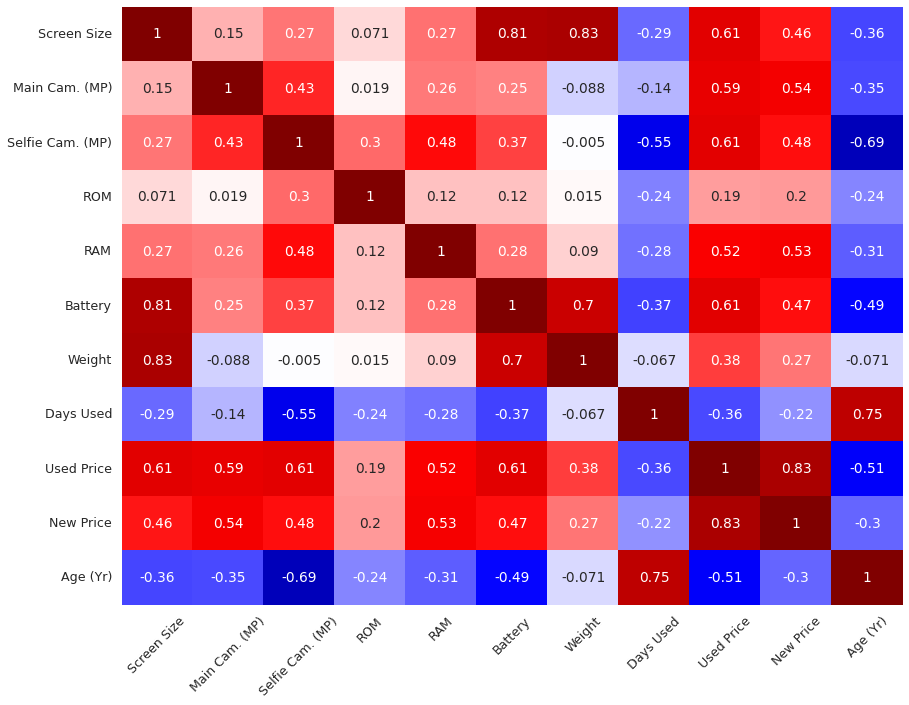

In [25]:
# Generating a more informative new feature out of release year
df['years_since_release'] = 2021 - df['release_year'] 

num_vars = df.select_dtypes(include = np.number).columns.tolist()
num_vars.remove('release_year')  # making a list of numerical variables w/o release year

# Generating the heatmap of numerical variables correlations
plt.figure(figsize = (14, 11));
corr_fig = sns.heatmap(df[num_vars].corr(), vmin = -1, vmax = 1, annot = True, cmap = 'seismic', cbar = False);
corr_fig.set_xticklabels(labels = ['Screen Size', 'Main Cam. (MP)', 'Selfie Cam. (MP)', 'ROM', 'RAM', 'Battery', 'Weight',
                                  'Days Used', 'Used Price', 'New Price', 'Age (Yr)'], rotation = 45);
corr_fig.set_yticklabels(labels = ['Screen Size', 'Main Cam. (MP)', 'Selfie Cam. (MP)', 'ROM', 'RAM', 'Battery', 'Weight',
                                  'Days Used', 'Used Price', 'New Price', 'Age (Yr)'], rotation = 0);

#### Observations:


*   The price of used devices has the highest positive correlation, predictably, with the price of the new device of the same model. After that, it is positively correlated with the screen size, quality of cameras, and RAM and battery capacities. It is also negatively correlated with the number of years since the device's release and the number of days the device has been in use. 
*   The same roughly applies to the price of new devices, too, except it is less correlated with the release year. 
*   Weight has a strong positive correlation with the battery capacity (which is one of the factors determining the final size of the device) and the screen size. In fact, these three variables are tightly positively correlated.
*   One can see that over the years, the quality of cameras have gotten better, the ROM and RAM have become larger, and the battery capacity and screen size have increased. Note the negative correlation of these variables with the years since relase of the device (age). 



**`RAM across Brands`**


Brands with unusually large RAMs:
['OnePlus']
Brands with unusually small RAMs:
['Celkon', 'Infinix']


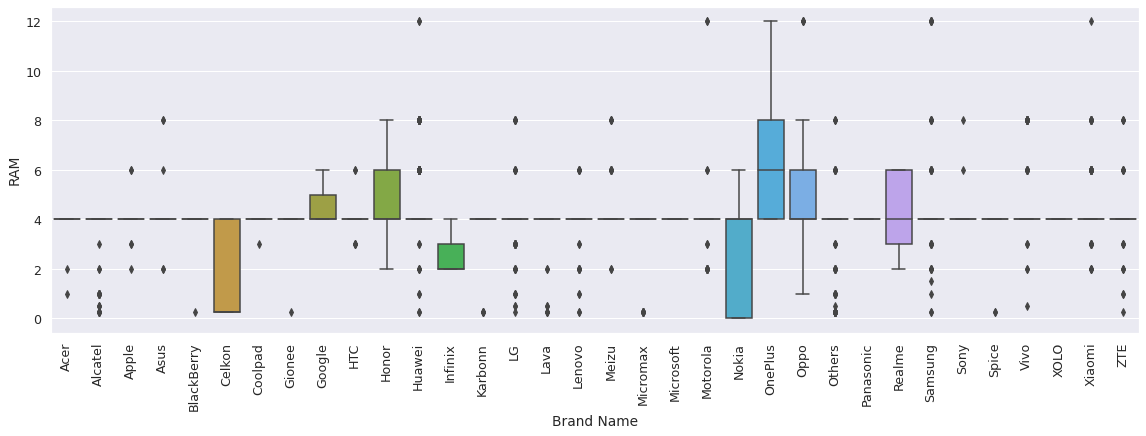

In [26]:
# Distribution of RAM capacity across different brands
plt.figure(figsize = (19.5, 6))
sns.boxplot(data = df, x = 'brand_name', y = 'ram', order = sorted(df.brand_name.unique()));
plt.xlabel('Brand Name')
plt.ylabel('RAM')
plt.xticks(rotation = 90);

# Showing brands whose RAM median is greater or less than typical 4 GB
print('Brands with unusually large RAMs:')
print(df.groupby('brand_name').ram.median().loc[df.groupby('brand_name').ram.median() > 4].index.tolist())
print('Brands with unusually small RAMs:')
print(df.groupby('brand_name').ram.median().loc[df.groupby('brand_name').ram.median() < 4].index.tolist())

#### Observations:

 

*   The amount of provided RAM doesn't vary much across different manufacturers.
*   With the exception of OnePlus brand that provides somewhat larger RAMs for its devices, and Celkon and Infinix devices that have somewhat smaller RAMs, the median value of RAM for all other brands is 4 GB. In fact, for many brands the main boxplot has been reduced to a single line at 4 GB, since there aren't many devices of that brand in the batch, and the vast majority of those present have 4 GB RAMs.



**`Weight Distribution of Large-battery Devices across Brands`**


9.87% of devices have batteries with energy capacity above 4500 mAh.
25 brands have devices whose battery energy capacities exceed 4500 mAh.



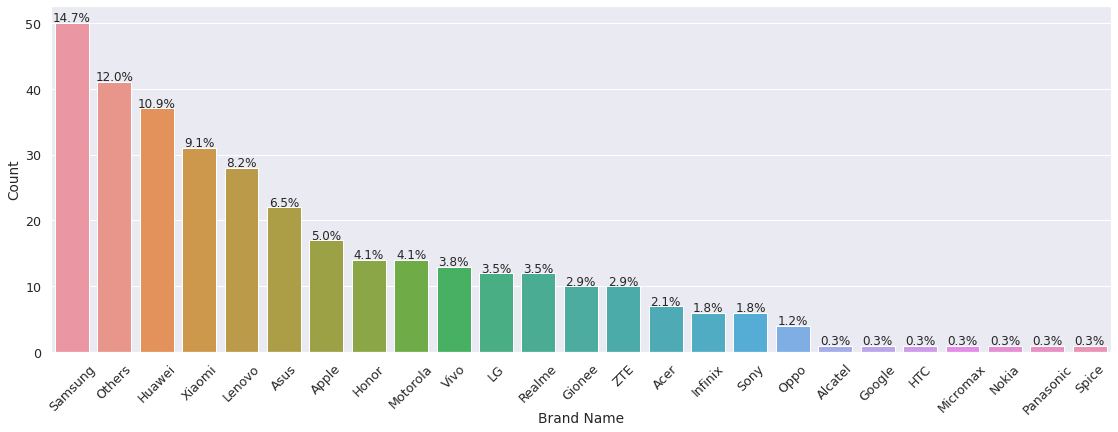

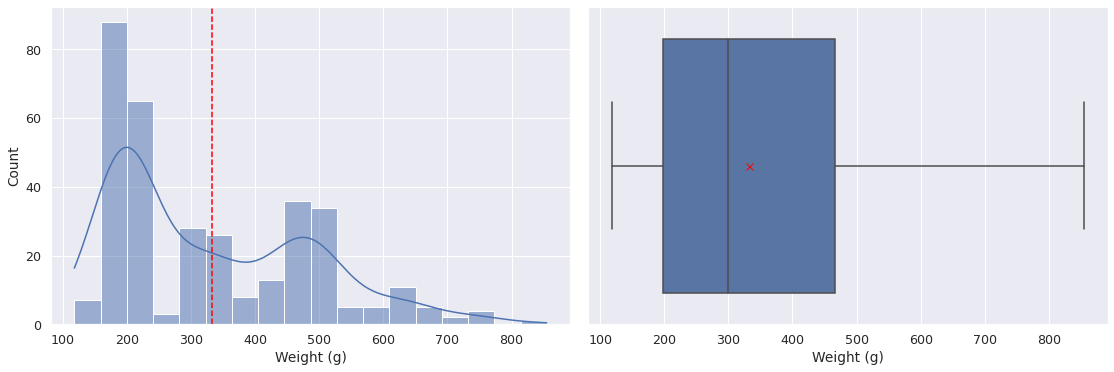

In [27]:
# Making a dataset of large-battery devices
df_large_batt = df.loc[df['battery'] > 4500].reset_index(drop = True) 
print('{}% of devices have batteries with energy capacity above 4500 mAh.'
        .format(round(df_large_batt.shape[0]/df.shape[0]*100,2)))
print('{} brands have devices whose battery energy capacities exceed 4500 mAh.\n'.format(df_large_batt.brand_name.nunique()))

# Generating the barplot of brands of devices with large battery 
plt.figure(figsize = (19, 14));
plt.subplot(211)
cntplt = sns.countplot(data = df_large_batt, x = 'brand_name', 
                       order = df_large_batt['brand_name'].value_counts(ascending = False).index.tolist());
countplot_labeling(cntplt, df_large_batt);
plt.xticks(rotation = 45);
plt.xlabel('Brand Name');
plt.ylabel('Count');
cntplt.xaxis.labelpad = -5

# Generating the weight distribution of large-battery devices
mv = df_large_batt['weight'].mean() # mean value
plt.figure(figsize = (15.7, 10));
plt.subplot(223)
sns.histplot(data = df_large_batt, x = 'weight', kde = True, bins = 18);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Weight (g)')
plt.subplot(224)
sns.boxplot(data = df_large_batt, x = 'weight', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Weight (g)')
plt.tight_layout();


#### Obserbations:



*   Only ~10% of devices (25 out of 34 brands) have large-capacity batteries. 
*   Samsung, uncategorized devices ('Others') and Huawei provide devices with the largest batteris among all brands.
*   As previously established, the weight and battery capacity are intimately correlated and, as a result, the median and average weights of large-battery devices are respectively 88% and 82% greater than those of all devices together.



**`Large-screen Devices across Different Brands`**


31.82% of devices have screen sizes above 6 inches.
31 brands have devices whose screen sizes exceed 6 inches.



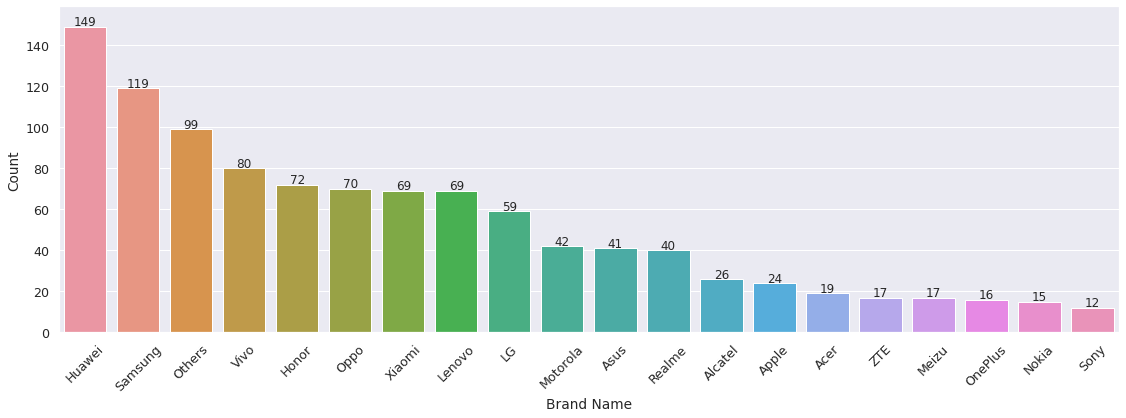

In [28]:
# Making a dataset of large-screen devices
df_large_screen = df.loc[df['screen_size'] > 6*2.54].reset_index(drop = True) 
print('{}% of devices have screen sizes above 6 inches.'
        .format(round(df_large_screen.shape[0]/df.shape[0]*100,2)))
print('{} brands have devices whose screen sizes exceed 6 inches.\n'.format(df_large_screen.brand_name.nunique()))

# Generating the barplot of brands of devices with large screens 
plt.figure(figsize = (19, 6));
cntplt = sns.countplot(data = df_large_screen, x = 'brand_name', 
                       order = df_large_screen['brand_name'].value_counts(ascending = False).index.tolist()[0:20]);
countplot_labeling(cntplt, df_large_screen, perc = False);
plt.xticks(rotation = 45);
plt.xlabel('Brand Name');
plt.ylabel('Count');
plt.ylim(0, 159);

#### Observations:


*   In recent years, most manufacturers have moved toward increasing the screen size of their devices. For this reason, it's not surpring to see that 31/34 brands provide large-screen devices and close to 1/3 of devices have quite large screens.
*   In the present batch of used devices, Huawei and Samsung produce the largest number of large-screen devices, so that close to 60% of Huawei devices and more than 1/3 of Samsung devices in the batch have screen sizes larger than 6 inch. 



**`High-quality Selfie Cameras across Different Brands`**


18.96% of devices have high-quality selfie cameras.
25 brands have devices whose selfie cameras have a higher resolution than the 75th percentile.



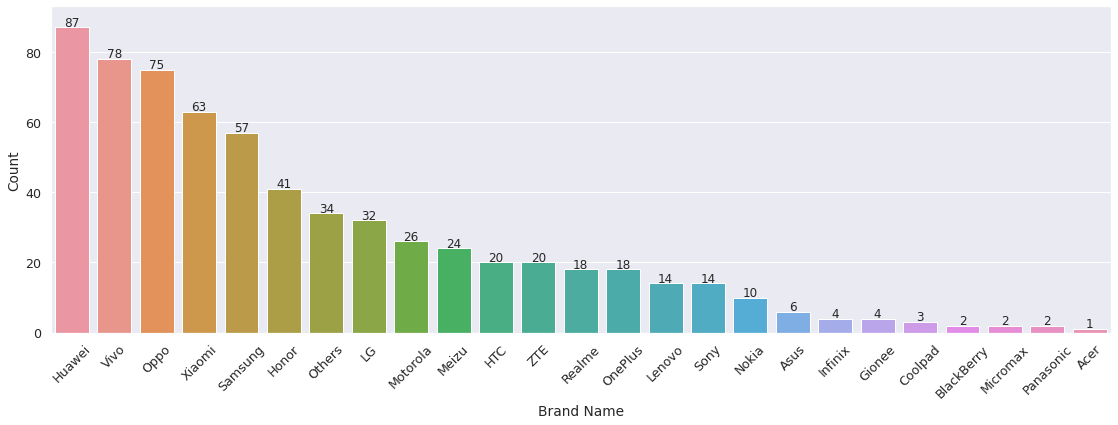

In [29]:
# Making a dataset of devices with high-quality selfie cameras
df_hq_selfie_cam = df.loc[df['selfie_camera_mp'] > df.selfie_camera_mp.quantile(0.75)].reset_index(drop = True) 
print('{}% of devices have high-quality selfie cameras.'
        .format(round(df_hq_selfie_cam.shape[0]/df.shape[0]*100,2)))
print('{} brands have devices whose selfie cameras have a higher resolution than the 75th percentile.\n'
        .format(df_hq_selfie_cam.brand_name.nunique()))

# Generating the barplot of brands of devices with high-quality selfie cameras 
plt.figure(figsize = (19, 6));
cntplt = sns.countplot(data = df_hq_selfie_cam, x = 'brand_name', 
                       order = df_hq_selfie_cam['brand_name'].value_counts(ascending = False).index.tolist());
countplot_labeling(cntplt, df_hq_selfie_cam, perc = False);
plt.xticks(rotation = 45);
plt.xlabel('Brand Name');
plt.ylabel('Count');
plt.ylim(0, 93);

**`High-quality Main Cameras across Different Brands`**


7.73% of devices have high-quality main cameras.
26 brands have devices whose main cameras have a higher resolution than the 75th percentile.



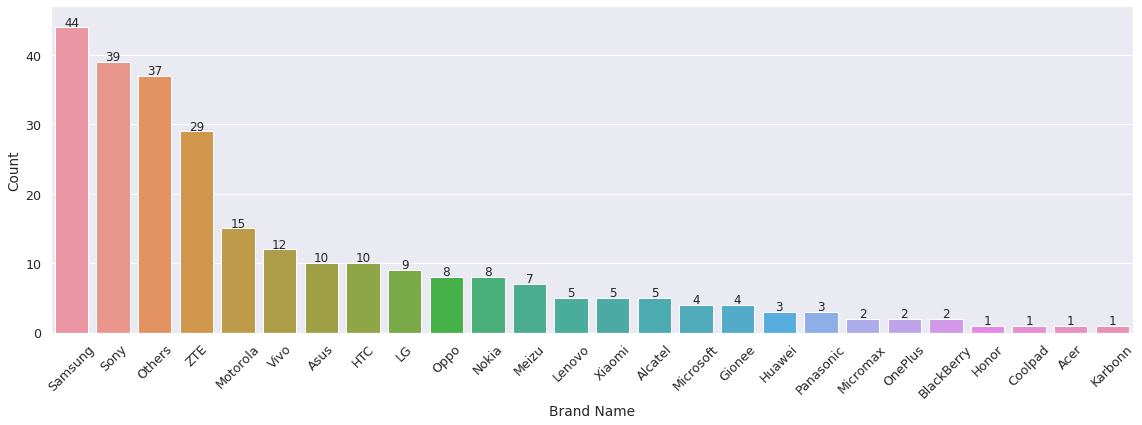

In [30]:
# Making a dataset of devices with high-quality main cameras
df_hq_main_cam = df.loc[df['main_camera_mp'] > df.main_camera_mp.quantile(0.75)].reset_index(drop = True) 
print('{}% of devices have high-quality main cameras.'
        .format(round(df_hq_main_cam.shape[0]/df.shape[0]*100,2)))
print('{} brands have devices whose main cameras have a higher resolution than the 75th percentile.\n'
        .format(df_hq_main_cam.brand_name.nunique()))

# Generating the barplot of brands of devices with high-quality main cameras 
plt.figure(figsize = (19.4, 6));
cntplt = sns.countplot(data = df_hq_main_cam, x = 'brand_name', 
                       order = df_hq_main_cam['brand_name'].value_counts(ascending = False).index.tolist());
countplot_labeling(cntplt, df_hq_main_cam, perc = False);
plt.xticks(rotation = 45);
plt.xlabel('Brand Name');
plt.ylabel('Count');
plt.ylim(0, 47);

#### Observations:


*   First off, note that 75th percentile of resolution has been taken as the threshold for separating the high-quality cameras from the others, which for selfie and main cameras equal 8 MP and 13 MP, respectively.
*   ~19% (25/34 brands) and ~8% (26/34 brands) of devices have high-quality selfie and main cameras, respectively. 
*   In the present batch, Huawei and Vivo provide the largest numbers of devices with high-resolution selfie cameras, while Samsung and Sony render the largest numbers of devices with high-quality main cameras. 



**`Price vs. Year for Used and New Devices`**


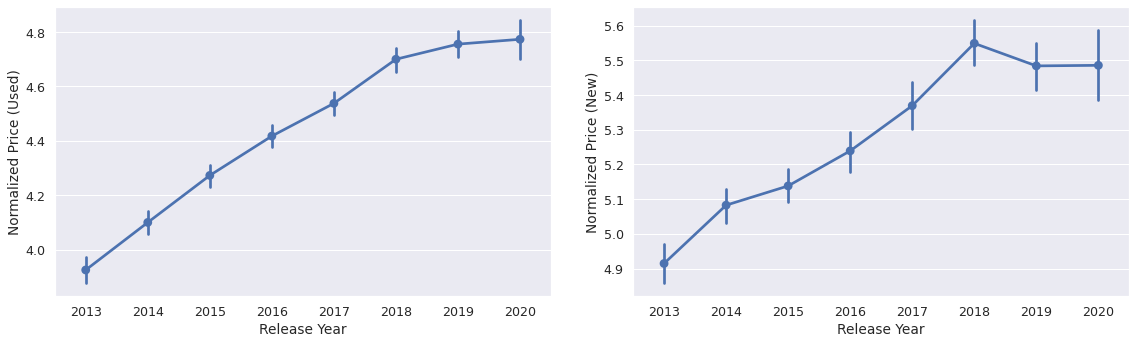

In [31]:
# Plotting the prices of used and new prices vs. year side by side

plt.figure(figsize = (16, 5))
plt.subplot(121)
sns.pointplot(data = df, x = 'release_year', y = 'normalized_used_price');
plt.xlabel('Release Year');
plt.ylabel('Normalized Price (Used)');
plt.subplot(122)
sns.pointplot(data = df, x = 'release_year', y = 'normalized_new_price');
plt.xlabel('Release Year');
plt.ylabel('Normalized Price (New)');
plt.tight_layout(w_pad = 2.5)

#### Observations:


*   As anticipated, overall, the more recent a phone model is, the higher its price (new or used) gets. There is a small dip past 2018 in the prices of new devices, which might be attributed to the efforts of some manufacturers to lower the prices of their newer models. 
*   The vertical lines in the plots indicate the 95% confidence intervals around the mean values of the price at each year, calculated using bootstrapping.





**`Used Price vs. Brand`**


Low-value brands: ['Spice', 'Karbonn', 'Celkon']
High-value brands: ['OnePlus', 'Apple', 'Google', 'Vivo', 'Oppo', 'Xiaomi', 'Huawei', 'Honor', 'Realme', 'Meizu', 'Sony', 'Samsung']


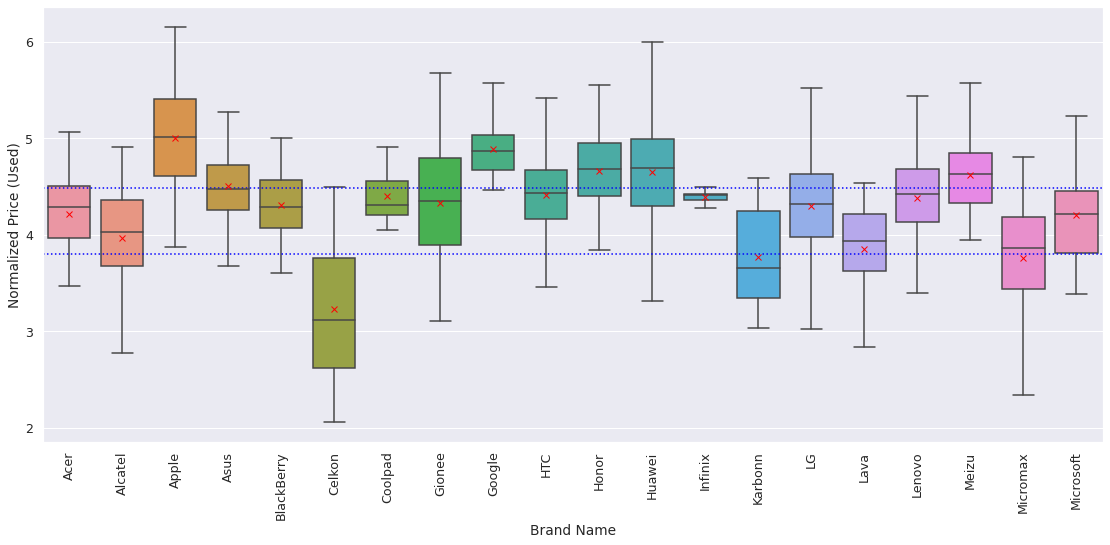

In [32]:
# Sorting brands by their median prices
brands_median_price = df.groupby('brand_name').normalized_used_price.median().sort_values(ascending = False)
# Evaluating the value 1/3 of the way between the lowest and highest brand median prices
lower_limit = brands_median_price.min() + (brands_median_price.max() - brands_median_price.min())/3.
# Evaluating the value 2/3 of the way between the lowest and highest brand median prices
upper_limit = brands_median_price.max() - (brands_median_price.max() - brands_median_price.min())/3.

print('Low-value brands:', brands_median_price.loc[brands_median_price.values < lower_limit].index.tolist())
print('High-value brands:', brands_median_price.loc[brands_median_price.values > upper_limit].index.tolist())

# Plotting the boxplot distribution of normalized prices (used) across brands
plt.figure(figsize = (19, 8));
sns.boxplot(data = df, x = 'brand_name', y = 'normalized_used_price', 
            order = brands_median_price.index.sort_values().tolist()[0:20],
            showfliers = False, showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});
plt.xlabel('Brand Name');
plt.ylabel('Normalized Price (Used)');
plt.xticks(rotation = 90);
plt.axhline(y = lower_limit, color = 'blue', linestyle = ':');
plt.axhline(y = upper_limit, color = 'blue', linestyle = ':');

#### Observations:


*   The lower and upper dotted blue lines are respectively 1/3 and 2/3 of the way between the lowest and highest brands' median prices. 

*   For the sake of better visualization, only the first 20 brands according to the alphabetical order have been shown.
  
*   As expected, the price of used devices is dependent on the brand, but the median prices of most brands lie between the two horizontal blue lines, i.e. they have moderate prices. The median prices of twelve brands fall above both lines, indicating that they are high-value brands, and three fall below the dotted blue lines, suggesting that they are low-value brands.   



**`Price Distribution of Used and New Devices with 4G/5G Capabilities`**


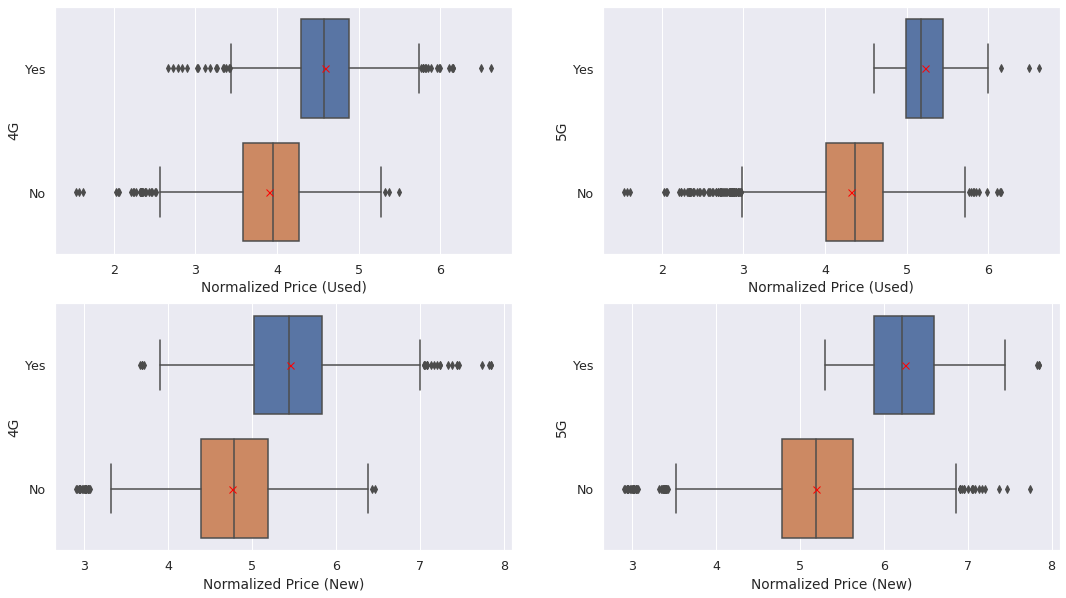

In [33]:
# Panel for used prices categorized by 4G status
plt.figure(figsize = (18, 10))
plt.subplot(221)
bxplt1 = sns.boxplot(data = df, x = 'normalized_used_price', y = '4g', order = ['yes', 'no'], showmeans = True,
                     meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
bxplt1.set_yticklabels(['Yes', 'No']);
plt.xlabel('Normalized Price (Used)');
plt.ylabel('4G');

# Panel for used prices categorized by 5G status
plt.subplot(222)
bxplt2 = sns.boxplot(data = df, x = 'normalized_used_price', y = '5g', order = ['yes', 'no'], showmeans = True,
                     meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
bxplt2.set_yticklabels(['Yes', 'No']);
plt.xlabel('Normalized Price (Used)');
plt.ylabel('5G');

# Panel for new prices categorized by 4G status
plt.subplot(223)
bxplt3 = sns.boxplot(data = df, x = 'normalized_new_price', y = '4g', order = ['yes', 'no'], showmeans = True,
                     meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
bxplt3.set_yticklabels(['Yes', 'No']);
plt.xlabel('Normalized Price (New)');
plt.ylabel('4G');

# Panel for new prices categorized by 5G status
plt.subplot(224)
bxplt4 = sns.boxplot(data = df, x = 'normalized_new_price', y = '5g', order = ['yes', 'no'], showmeans = True,
                     meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
bxplt4.set_yticklabels(['Yes', 'No']);
plt.xlabel('Normalized Price (New)');
plt.ylabel('5G');

#### Observations:


As can nee seen, the availability of 4G and 5G technologies drives up the prices of both used and new devices. The 5G capability causes a slightly sharper jump in the price (~20% compared to ~15%).




## Data Preprocessing

Here, we treat the missing values, engineer a couple of new features and detect and display the outliers. We leave further preparation of the data for regression modeling for the Model Building section.


### Missing Value Treatment



*   We found out that missing (nan) values exist in *six numerical columns*. 

*   We also estabslished that different variables normally vary significantly with the *brand* and *release year*. So among different (categorical) variables, we choose these two features to group the data and use the measures of central tendency of each group to impute the missing values.

*   We observed that, except used and new prices (these two columns have no missing values), all other numerical variables typically have strongly skewed distributions, implying that *median* is a much better candidate than mean for imputation of missing values.   


In [34]:
# Let's check the columns with missing values again
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
years_since_release        0
dtype: int64

In [35]:
# Storing columns with missing values in a list
cols_with_nans = (df.isnull().sum()).loc[df.isnull().sum() > 0].index.tolist()

print('Columns with missing values:', cols_with_nans)

Columns with missing values: ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']


In [36]:
# Doing a loop on all columns with null values to fill them out with the median of the corresponding group
df_imputed = df.copy()  # making a new copy of dataset to which imputation is applied
for col in cols_with_nans:
  df_imputed[col] = df[col].fillna(value = 
                                   df.groupby(['brand_name', 'release_year'])[col].transform('median'))
  
# Storing columns with missing values in a list
cols_with_nans = (df_imputed.isnull().sum()).loc[df_imputed.isnull().sum() > 0].index.tolist()
print('Columns with missing values after the first round of imputation:', cols_with_nans, end = '\n'*2)
df_imputed.isnull().sum()

Columns with missing values after the first round of imputation: ['main_camera_mp', 'selfie_camera_mp', 'battery', 'weight']



brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
years_since_release        0
dtype: int64

In [37]:
# Peeking some of the entries with missing main_camera_mp
df_imputed.loc[df_imputed.main_camera_mp.isnull()].head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,years_since_release
59,Infinix,Android,17.320,yes,no,NaN,8.000,32.000,2.000,6000.000,209.000,2020,245,4.282,4.598,1
60,Infinix,Android,15.390,yes,no,NaN,8.000,64.000,4.000,5000.000,185.000,2020,173,4.364,4.712,1
61,Infinix,Android,15.390,yes,no,NaN,8.000,32.000,2.000,5000.000,185.000,2020,256,4.181,4.505,1
62,Infinix,Android,15.390,yes,no,NaN,16.000,32.000,3.000,4000.000,178.000,2019,316,4.555,4.602,2
63,Infinix,Android,15.290,yes,no,NaN,16.000,32.000,2.000,4000.000,165.000,2019,468,4.417,4.871,2


In [38]:
# Peeking the entries with missing weight
df_imputed.loc[df_imputed.weight.isnull()]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,years_since_release
3002,XOLO,Android,12.700,yes,no,13.000,5.000,32.000,4.000,2400.000,NaN,2015,576,4.166,4.930,6
3003,XOLO,Android,12.830,yes,no,8.000,5.000,16.000,4.000,3200.000,NaN,2015,800,4.282,5.189,6
3004,XOLO,Android,12.700,no,no,8.000,2.000,32.000,4.000,2100.000,NaN,2015,878,3.880,4.081,6
3005,XOLO,Android,10.290,no,no,5.000,0.300,32.000,4.000,1800.000,NaN,2015,1036,3.824,4.396,6
3006,XOLO,Android,12.700,no,no,5.000,0.300,16.000,4.000,2500.000,NaN,2015,679,3.837,4.347,6
3007,XOLO,Windows,12.700,no,no,8.000,2.000,32.000,4.000,2200.000,NaN,2015,838,3.707,4.792,6
3008,XOLO,Android,12.700,no,no,8.000,5.000,32.000,4.000,2500.000,NaN,2015,1045,4.185,4.785,6


In [39]:
#  Checking devices made by Infinix in 2020
df_imputed.loc[(df_imputed.brand_name == 'Infinix') & (df_imputed.release_year == 2020)]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,years_since_release
59,Infinix,Android,17.320,yes,no,NaN,8.000,32.000,2.000,6000.000,209.000,2020,245,4.282,4.598,1
60,Infinix,Android,15.390,yes,no,NaN,8.000,64.000,4.000,5000.000,185.000,2020,173,4.364,4.712,1
61,Infinix,Android,15.390,yes,no,NaN,8.000,32.000,2.000,5000.000,185.000,2020,256,4.181,4.505,1
278,Infinix,Android,17.320,yes,no,NaN,8.000,32.000,2.000,6000.000,209.000,2020,320,4.405,4.605,1
279,Infinix,Android,15.390,yes,no,NaN,8.000,64.000,4.000,5000.000,185.000,2020,173,4.496,4.702,1
280,Infinix,Android,15.390,yes,no,NaN,8.000,32.000,2.000,5000.000,185.000,2020,329,4.371,4.487,1


In [40]:
#  Checking devices made by XOLO in 2015
df_imputed.loc[(df_imputed.brand_name == 'XOLO') & (df_imputed.release_year == 2015)]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,years_since_release
3002,XOLO,Android,12.700,yes,no,13.000,5.000,32.000,4.000,2400.000,NaN,2015,576,4.166,4.930,6
3003,XOLO,Android,12.830,yes,no,8.000,5.000,16.000,4.000,3200.000,NaN,2015,800,4.282,5.189,6
3004,XOLO,Android,12.700,no,no,8.000,2.000,32.000,4.000,2100.000,NaN,2015,878,3.880,4.081,6
3005,XOLO,Android,10.290,no,no,5.000,0.300,32.000,4.000,1800.000,NaN,2015,1036,3.824,4.396,6
3006,XOLO,Android,12.700,no,no,5.000,0.300,16.000,4.000,2500.000,NaN,2015,679,3.837,4.347,6
3007,XOLO,Windows,12.700,no,no,8.000,2.000,32.000,4.000,2200.000,NaN,2015,838,3.707,4.792,6
3008,XOLO,Android,12.700,no,no,8.000,5.000,32.000,4.000,2500.000,NaN,2015,1045,4.185,4.785,6


#### Observations:

After the fisrt attempt on imputation, still four columns have missing values. As can be observed above, the reason is that when categorizng by 'release_year' and 'brand_name', sometimes all entries in the same group have null values of the same type, and can't be used for imputation. Therefore, we repeat the treatment process this time by grouping them only based on the brand. 

In [41]:
# Doing a loop on all columns with null values to fill them out with median of corresponding group
for col in cols_with_nans:
  df_imputed[col] = df_imputed[col].fillna(value = 
                                   df_imputed.groupby(['brand_name'])[col].transform('median'))
    
# Storing columns with missing values in a list
cols_with_nans = (df_imputed.isnull().sum()).loc[df_imputed.isnull().sum() > 0].index.tolist()
print('Columns with missing values after the second round of imputation:', cols_with_nans, end = '\n'*2)
df_imputed.isnull().sum()

Columns with missing values after the second round of imputation: ['main_camera_mp']



brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
years_since_release       0
dtype: int64

In [42]:
# Checking columns with missing main_camera_mp
df_imputed.loc[df_imputed.main_camera_mp.isnull()]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,years_since_release
59,Infinix,Android,17.320,yes,no,NaN,8.000,32.000,2.000,6000.000,209.000,2020,245,4.282,4.598,1
60,Infinix,Android,15.390,yes,no,NaN,8.000,64.000,4.000,5000.000,185.000,2020,173,4.364,4.712,1
61,Infinix,Android,15.390,yes,no,NaN,8.000,32.000,2.000,5000.000,185.000,2020,256,4.181,4.505,1
62,Infinix,Android,15.390,yes,no,NaN,16.000,32.000,3.000,4000.000,178.000,2019,316,4.555,4.602,2
63,Infinix,Android,15.290,yes,no,NaN,16.000,32.000,2.000,4000.000,165.000,2019,468,4.417,4.871,2
278,Infinix,Android,17.320,yes,no,NaN,8.000,32.000,2.000,6000.000,209.000,2020,320,4.405,4.605,1
279,Infinix,Android,15.390,yes,no,NaN,8.000,64.000,4.000,5000.000,185.000,2020,173,4.496,4.702,1
280,Infinix,Android,15.390,yes,no,NaN,8.000,32.000,2.000,5000.000,185.000,2020,329,4.371,4.487,1
281,Infinix,Android,15.390,yes,no,NaN,16.000,32.000,3.000,4000.000,178.000,2019,356,4.418,4.606,2
282,Infinix,Android,15.290,yes,no,NaN,16.000,32.000,2.000,4000.000,165.000,2019,497,4.423,4.866,2


In [43]:
# Checking devices manufactured by Infinix
df_imputed.loc[df_imputed.brand_name == 'Infinix']

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,years_since_release
59,Infinix,Android,17.320,yes,no,NaN,8.000,32.000,2.000,6000.000,209.000,2020,245,4.282,4.598,1
60,Infinix,Android,15.390,yes,no,NaN,8.000,64.000,4.000,5000.000,185.000,2020,173,4.364,4.712,1
61,Infinix,Android,15.390,yes,no,NaN,8.000,32.000,2.000,5000.000,185.000,2020,256,4.181,4.505,1
62,Infinix,Android,15.390,yes,no,NaN,16.000,32.000,3.000,4000.000,178.000,2019,316,4.555,4.602,2
63,Infinix,Android,15.290,yes,no,NaN,16.000,32.000,2.000,4000.000,165.000,2019,468,4.417,4.871,2
278,Infinix,Android,17.320,yes,no,NaN,8.000,32.000,2.000,6000.000,209.000,2020,320,4.405,4.605,1
279,Infinix,Android,15.390,yes,no,NaN,8.000,64.000,4.000,5000.000,185.000,2020,173,4.496,4.702,1
280,Infinix,Android,15.390,yes,no,NaN,8.000,32.000,2.000,5000.000,185.000,2020,329,4.371,4.487,1
281,Infinix,Android,15.390,yes,no,NaN,16.000,32.000,3.000,4000.000,178.000,2019,356,4.418,4.606,2
282,Infinix,Android,15.290,yes,no,NaN,16.000,32.000,2.000,4000.000,165.000,2019,497,4.423,4.866,2


#### Observations:

Still 10 entries have missing values (NaN for their 'main_camera_mp'). This happened because all devices made by Infinix had missing values for their main camera resolution. We'll impute these 10 values, with no grouping and using the median value for the 'main_camera_mp' of all devices.

In [44]:
# Imputing the remainder of main_camera_mp column
df_imputed['main_camera_mp'] = df_imputed['main_camera_mp'].fillna(value = df_imputed['main_camera_mp'].median())

cols_with_nans = (df_imputed.isnull().sum()).loc[df_imputed.isnull().sum() > 0].index.tolist()
print('Columns with missing values after the third round of imputation:', cols_with_nans)    
print('Number of entries with missing values:', df_imputed.isnull().sum().sum())

Columns with missing values after the third round of imputation: []
Number of entries with missing values: 0


#### Observations:

The dataset has no longer any missing values. Mission accomplished!

### Feature Engineering

*   We already created a new feature, which is age or 'years_since_release' of the device, when we sought to plot the heatmap of correlations. We will use this variable, instead of 'release_year', when building our regression-based model. 

*   We also have a speculation that working with the level of the brand median price (high-value, moderately valued and low-value), instead of each brand individually, would lead to an equally accurate but much more neat and compact model. For this reason, we will add a new category that determines the price level of the corresponding brand of a certain used device. 

In [45]:
# dropping the 'release_year' column from imputed data
df_imputed.drop(columns = 'release_year', axis = 1, inplace = True)
df_imputed.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.500,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,127,4.308,4.715,1
1,Honor,Android,17.300,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,325,5.162,5.519,1
2,Honor,Android,16.690,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,162,5.111,5.885,1
3,Honor,Android,25.500,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,345,5.135,5.631,1
4,Honor,Android,15.320,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,293,4.390,4.948,1


In [46]:
# Generating the 'brand_price' category

# Sorting brands by their median price
brands_median_price = df_imputed.groupby('brand_name').normalized_used_price.median().sort_values(ascending = False)
# Evaluating the value 1/3 of the way between the lowest and highest brand median prices
lower_limit = brands_median_price.min() + (brands_median_price.max() - brands_median_price.min())/3.
# Evaluating the value 2/3 of the way between the lowest and highest brand median prices
upper_limit = brands_median_price.max() - (brands_median_price.max() - brands_median_price.min())/3.

# Adding a temporary column containing the median price of the device's brand
for i in range(df_imputed.shape[0]):
  df_imputed.loc[i, 'brand_median_price'] = brands_median_price[df_imputed.loc[i, 'brand_name']]

df_imputed['brand_price'] = pd.cut(df_imputed['brand_median_price'], bins = [0, lower_limit, upper_limit, brands_median_price.max()*1.01], 
                                   labels = ['low', 'moderate', 'high'], right = False)
df_imputed.head() 

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release,brand_median_price,brand_price
0,Honor,Android,14.500,yes,no,13.000,5.000,64.000,3.000,3020.000,146.000,127,4.308,4.715,1,4.683,high
1,Honor,Android,17.300,yes,yes,13.000,16.000,128.000,8.000,4300.000,213.000,325,5.162,5.519,1,4.683,high
2,Honor,Android,16.690,yes,yes,13.000,8.000,128.000,8.000,4200.000,213.000,162,5.111,5.885,1,4.683,high
3,Honor,Android,25.500,yes,yes,13.000,8.000,64.000,6.000,7250.000,480.000,345,5.135,5.631,1,4.683,high
4,Honor,Android,15.320,yes,no,13.000,8.000,64.000,3.000,5000.000,185.000,293,4.390,4.948,1,4.683,high


In [47]:
# Dropping the 'brand_median_price' column from imputed dataset
df_imputed.drop(columns = 'brand_median_price', axis = 1, inplace = True)

### Outlier Check

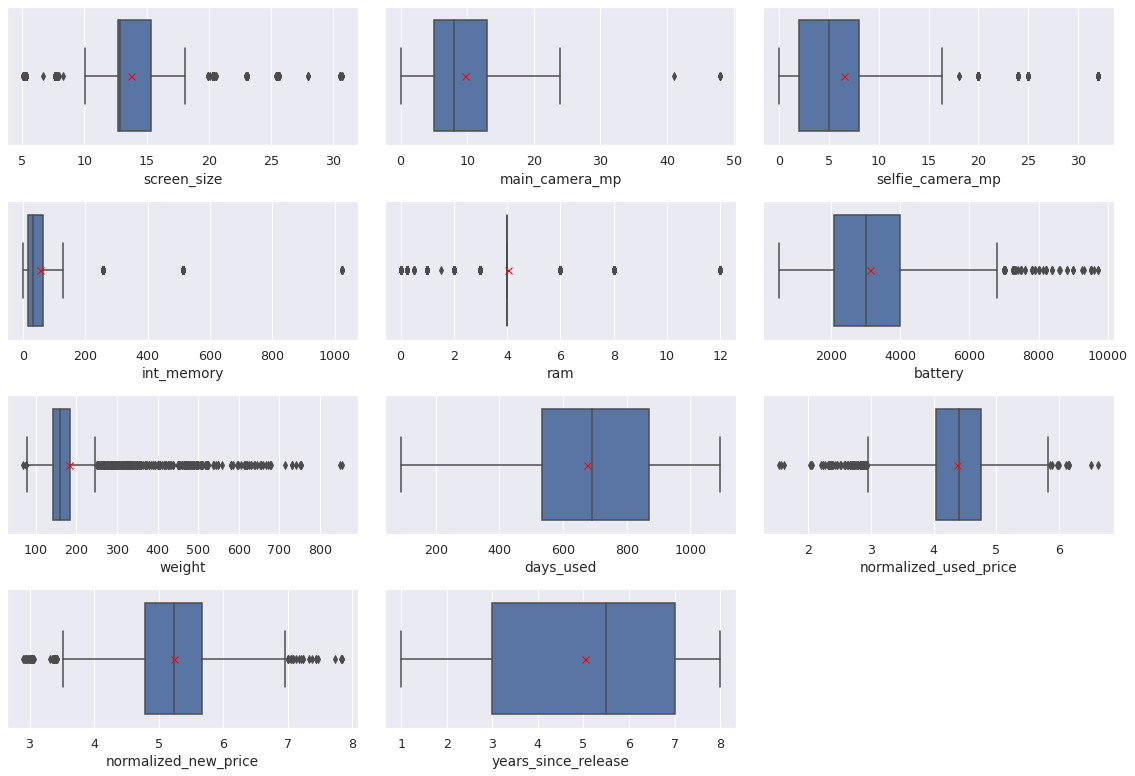

In [48]:
# Listing all numerical columns
num_cols = df_imputed.select_dtypes(include = np.number).columns.tolist()

# Checking the outliers of the numerical variables
plt.figure(figsize = (16, 11))
for i, col in enumerate(num_cols):
  plt.subplot(4, 3, i+1);
  sns.boxplot(data = df_imputed, x = col, showmeans = True,
              meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});

plt.tight_layout()

#### Observations:

All numerical columns, except 'years_since_release' and 'days_used', reveal several outliers, but we choose to keep them all, since all of them are really part of the data and are representatives of actual phones/tablets, and none has been added by mistake. So no action is taken to treat/remove outliers.

###  Post-imputation EDA (brief)

In this section, we proceed to repeat a quick EDA on the six imputed columns, and compare them with pre-imputation results. The properties of other columns have certainly remained unchanged.

In [49]:
# Making a dataframe of statistical properties of columns before and after imputations
cols_with_nans = (df.isnull().sum()).loc[df.isnull().sum() > 0].index.tolist()

# dataframe contaning the percentage of change in means and medians pre/post-imputation
df_stats_nan_cols = pd.DataFrame({'Columns': cols_with_nans})

for i, col in enumerate(cols_with_nans):
  df_stats_nan_cols.loc[i, 'Mean Change (%)'] = (df_imputed[col].mean() - df[col].mean())/df[col].mean()*100
  df_stats_nan_cols.loc[i, 'Median Change (%)'] = (df_imputed[col].median() - df[col].median())/df[col].median()*100

df_stats_nan_cols

,Columns,Mean Change (%),Median Change (%)
0,main_camera_mp,1.664,0.000
1,selfie_camera_mp,0.013,0.000
2,int_memory,-0.082,0.000
3,ram,-0.087,0.000
4,battery,-0.026,0.000
5,weight,-0.063,0.000


#### Observations:

As can be seen, the medians haven't changed and mean values have barely varied. The biggest change has happend for 'main_camera_mp' which had the largest amount of missing values. Let's double-check this with distribution plots of these six columns (before and after imputation).

**`Main Camera (MP)`**

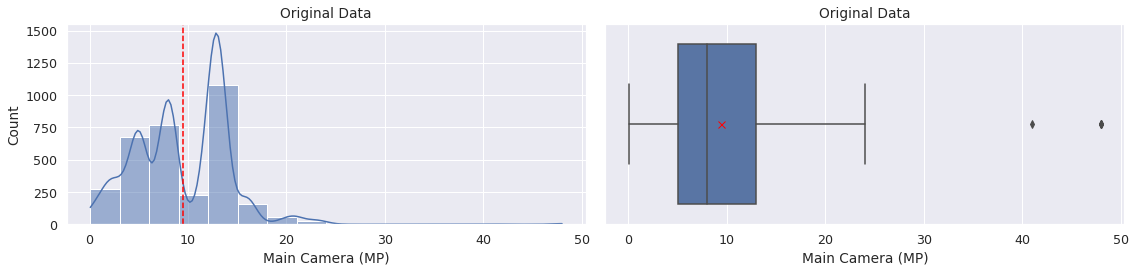

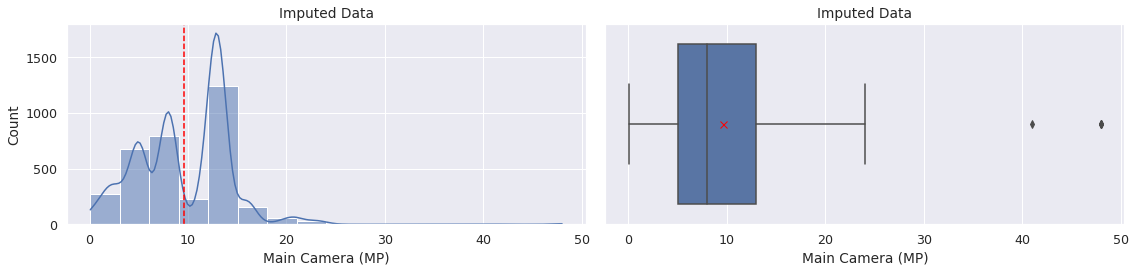

In [50]:
# Plotting the distribution of the resolution of main cameras (MP)

# mean values
mv = df['main_camera_mp'].mean()
mv_imputed = df_imputed['main_camera_mp'].mean()

# Histogram and boxplot for original data
plt.figure(figsize = (16, 4));
plt.subplot(121)
sns.histplot(data = df, x = 'main_camera_mp', kde = True, bins = 16);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Main Camera (MP)')
plt.title('Original Data')
plt.subplot(122)
sns.boxplot(data = df, x = 'main_camera_mp', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Main Camera (MP)')
plt.title('Original Data')
plt.tight_layout()

# Histogram and boxplot for imputed data
plt.figure(figsize = (16, 4));
plt.subplot(121)
sns.histplot(data = df_imputed, x = 'main_camera_mp', kde = True, bins = 16);
plt.axvline(mv_imputed, color = 'red', linestyle = '--');
plt.xlabel('Main Camera (MP)')
plt.title('Imputed Data')
plt.subplot(122)
sns.boxplot(data = df_imputed, x = 'main_camera_mp', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Main Camera (MP)')
plt.title('Imputed Data')
plt.tight_layout()

**`Selfie Camera (MP)`**

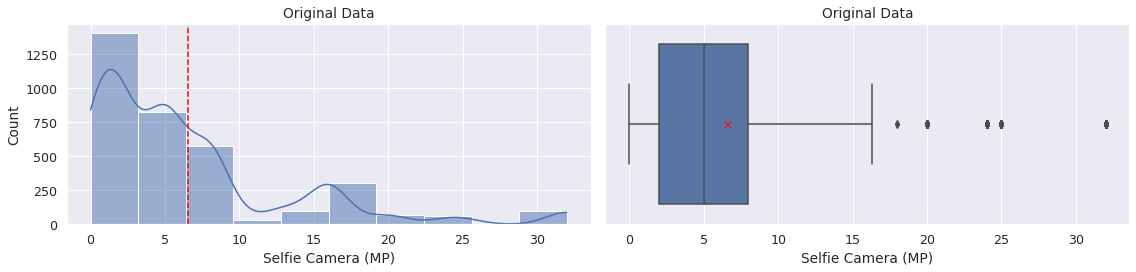

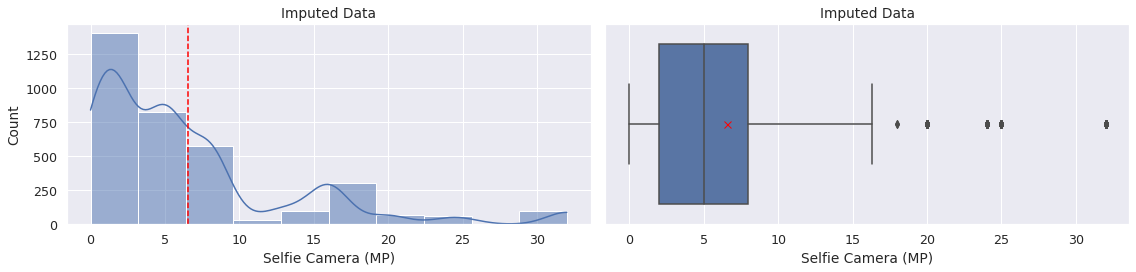

In [51]:
# Plotting the distribution of the resolution of selfie cameras (MP)

# mean values
mv = df['selfie_camera_mp'].mean()
mv_imputed = df_imputed['selfie_camera_mp'].mean()

# Histogram and boxplot for original data
plt.figure(figsize = (16, 4));
plt.subplot(121)
sns.histplot(data = df, x = 'selfie_camera_mp', kde = True, bins = 10);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Selfie Camera (MP)')
plt.title('Original Data')
plt.subplot(122)
sns.boxplot(data = df, x = 'selfie_camera_mp', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Selfie Camera (MP)')
plt.title('Original Data')
plt.tight_layout()

# Histogram and boxplot for imputed data
plt.figure(figsize = (16, 4));
plt.subplot(121)
sns.histplot(data = df_imputed, x = 'selfie_camera_mp', kde = True, bins = 10);
plt.axvline(mv_imputed, color = 'red', linestyle = '--');
plt.xlabel('Selfie Camera (MP)')
plt.title('Imputed Data')
plt.subplot(122)
sns.boxplot(data = df_imputed, x = 'selfie_camera_mp', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Selfie Camera (MP)')
plt.title('Imputed Data')
plt.tight_layout()

**`Internal Memory`**

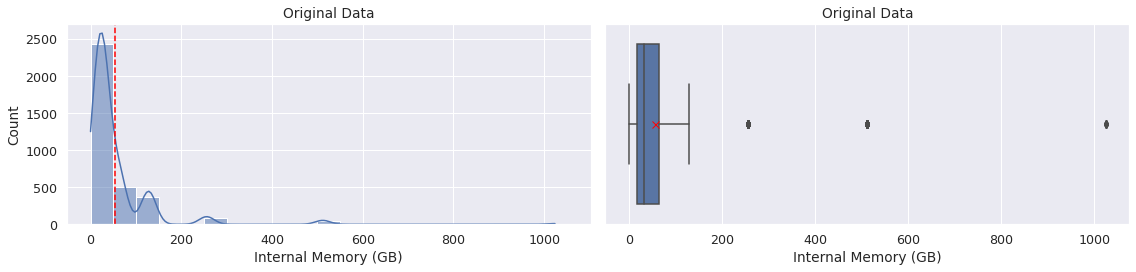

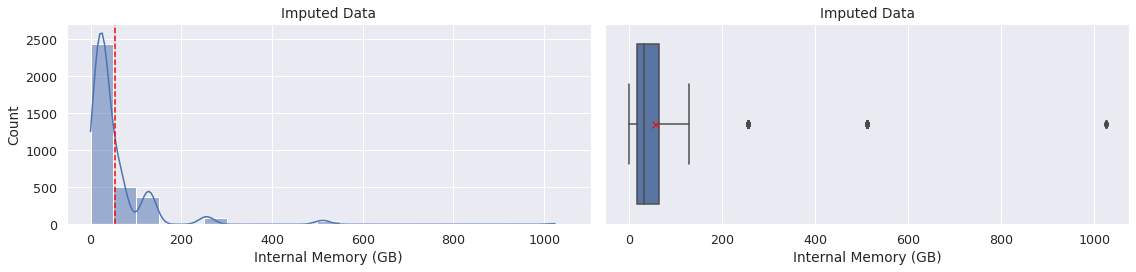

In [52]:
# Plotting the distribution of internal memory capacities (GB)

# mean values
mv = df['int_memory'].mean()
mv_imputed = df_imputed['int_memory'].mean()

# Histogram and boxplot for original data
plt.figure(figsize = (16, 4));
plt.subplot(121)
sns.histplot(data = df, x = 'int_memory', kde = True, binwidth = 50);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Internal Memory (GB)')
plt.title('Original Data')
plt.subplot(122)
sns.boxplot(data = df, x = 'int_memory', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Internal Memory (GB)')
plt.title('Original Data')
plt.tight_layout()

# Histogram and boxplot for imputed data
plt.figure(figsize = (16, 4));
plt.subplot(121)
sns.histplot(data = df_imputed, x = 'int_memory', kde = True, binwidth = 50);
plt.axvline(mv_imputed, color = 'red', linestyle = '--');
plt.xlabel('Internal Memory (GB)')
plt.title('Imputed Data')
plt.subplot(122)
sns.boxplot(data = df_imputed, x = 'int_memory', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Internal Memory (GB)')
plt.title('Imputed Data')
plt.tight_layout()

**`RAM`**

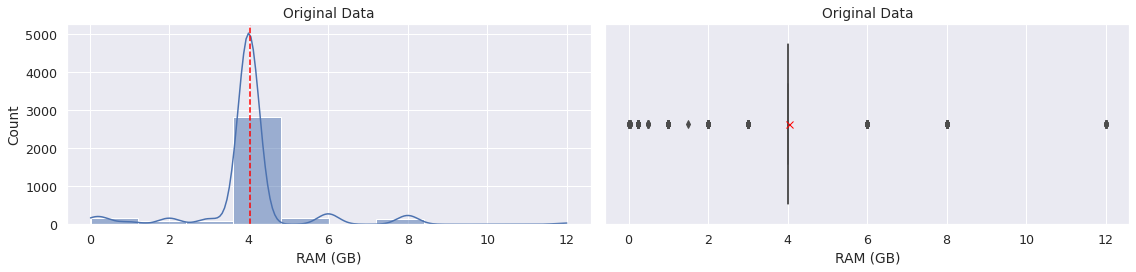

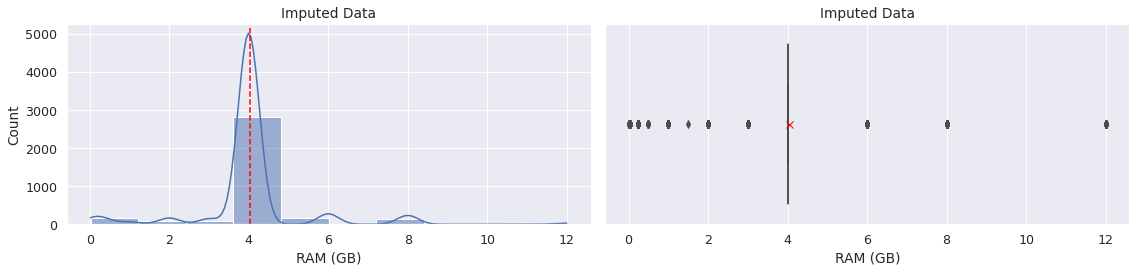

In [53]:
# Plotting the distribution of the RAM capacities (GB)

# mean values
mv = df['ram'].mean()
mv_imputed = df_imputed['ram'].mean()

# Histogram and boxplot for original data
plt.figure(figsize = (16, 4));
plt.subplot(121)
sns.histplot(data = df, x = 'ram', kde = True, bins = 10);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('RAM (GB)')
plt.title('Original Data')
plt.subplot(122)
sns.boxplot(data = df, x = 'ram', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('RAM (GB)')
plt.title('Original Data')
plt.tight_layout()

# Histogram and boxplot for imputed data
plt.figure(figsize = (16, 4));
plt.subplot(121)
sns.histplot(data = df_imputed, x = 'ram', kde = True, bins = 10);
plt.axvline(mv_imputed, color = 'red', linestyle = '--');
plt.xlabel('RAM (GB)')
plt.title('Imputed Data')
plt.subplot(122)
sns.boxplot(data = df_imputed, x = 'ram', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('RAM (GB)')
plt.title('Imputed Data')
plt.tight_layout()

**`Battery`**

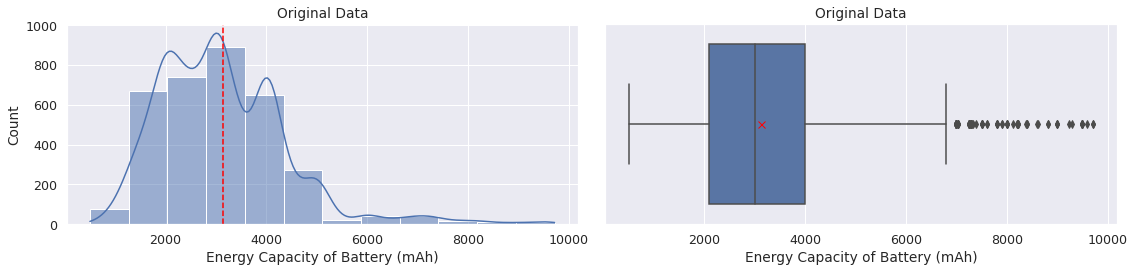

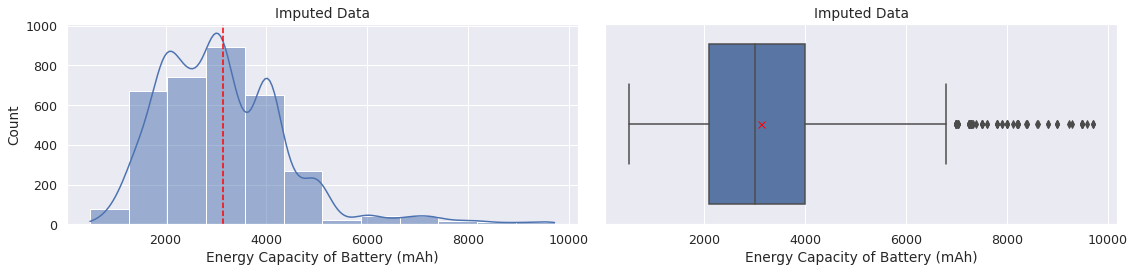

In [54]:
# Plotting the distribution of battery energy capacities (mAh)

# mean values
mv = df['battery'].mean()
mv_imputed = df_imputed['battery'].mean()

# Histogram and boxplot for original data
plt.figure(figsize = (16, 4));
plt.subplot(121)
sns.histplot(data = df, x = 'battery', kde = True, bins = 12);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Energy Capacity of Battery (mAh)')
plt.title('Original Data')
plt.subplot(122)
sns.boxplot(data = df, x = 'battery', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Energy Capacity of Battery (mAh)')
plt.title('Original Data')
plt.tight_layout()

# Histogram and boxplot for imputed data
plt.figure(figsize = (16, 4));
plt.subplot(121)
sns.histplot(data = df_imputed, x = 'battery', kde = True, bins = 12);
plt.axvline(mv_imputed, color = 'red', linestyle = '--');
plt.xlabel('Energy Capacity of Battery (mAh)')
plt.title('Imputed Data')
plt.subplot(122)
sns.boxplot(data = df_imputed, x = 'battery', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Energy Capacity of Battery (mAh)')
plt.title('Imputed Data')
plt.tight_layout()

**`Weight`**

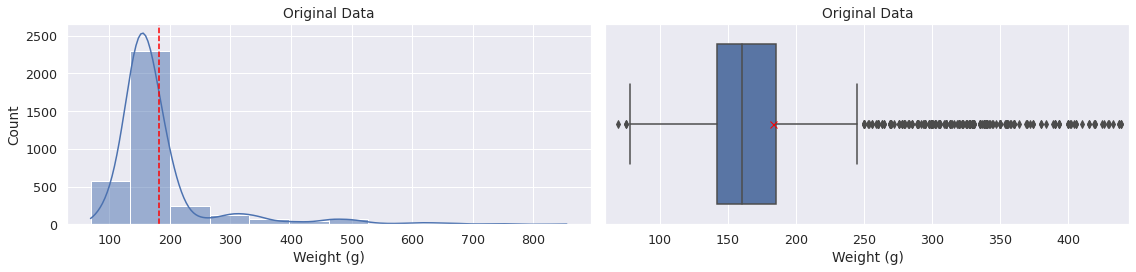

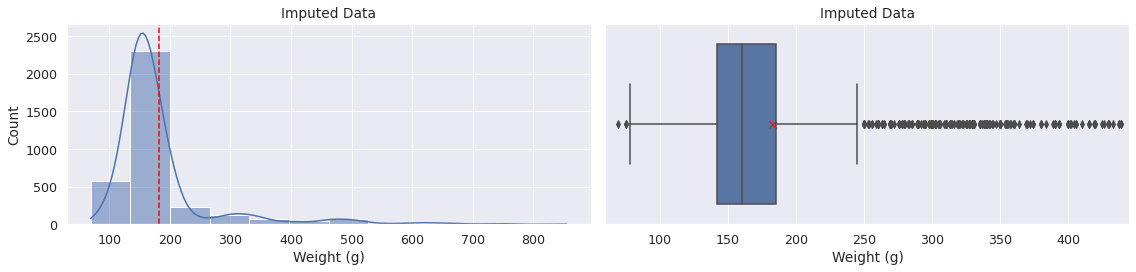

In [55]:
# Plotting the distribution of device weights (g)

# mean values
mv = df['weight'].mean()
mv_imputed = df_imputed['weight'].mean()

# Histogram and boxplot for original data
plt.figure(figsize = (16, 4));
plt.subplot(121)
sns.histplot(data = df, x = 'weight', kde = True, bins = 12);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Weight (g)')
plt.title('Original Data')
plt.subplot(122)
sns.boxplot(data = df, x = 'weight', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Weight (g)')
plt.title('Original Data')
plt.xlim(60, 445)  # To make the main portion of the boxplot more visible, outliers above 445 haven't been shown
plt.tight_layout()

# Histogram and boxplot for imputed data
plt.figure(figsize = (16, 4));
plt.subplot(121)
sns.histplot(data = df_imputed, x = 'weight', kde = True, bins = 12);
plt.axvline(mv_imputed, color = 'red', linestyle = '--');
plt.xlabel('Weight (g)')
plt.title('Imputed Data')
plt.subplot(122)
sns.boxplot(data = df_imputed, x = 'weight', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Weight (g)')
plt.title('Imputed Data')
plt.xlim(60, 445)  # To make the main portion of the boxplot more visible, outliers above 445 haven't been shown
plt.tight_layout()

#### Observations:

As can be seen, silimar to the measures of central tendency, the post-imputation changes in distributions are so *little* that are indistinguishable.

## Model Building - Linear Regression

We use two approaches for building our regression model:
  
1.   First, we use *'brand_name'* category to generate dummy variables, while dropping the 'brand_price' category.
2.   In the second approach, we retain the *'brand_price'* column and drop the 'brand_name' feature. .

Evidently, the second approach would result in much fewer dummy variables. We will compare the two approaches against each other, and pick the best according to their performances as well as compactness. 

In [56]:
# Defining functions necessary to evaluate the performance of a regression model

# Defining adjusted r2 score
def adj_r2_score(y_truth, y_pred, X):
  '''This function calculates the adjusted R2 score, using the r2 score function
  of python, which becomes different fromR2, when doing multi-regression.'''

  n = X.shape[0]      # size of training/testing set 
  k = X.shape[1] - 1  # number of predictors (minus intercept) 
  R2 = r2_score(y_truth, y_pred)
  R2_adj = 1 - (n-1)/(n-k-1)*(1 - R2)

  return R2_adj

# Defining MAPE score
def mape_score(y_truth, y_pred):
  '''This function gets the prediction and ground truth and calculates the MAPE score,
  , or Mean Absolute Percentage Error, which, putting simply, measures the average of
  relative difference between predictions and actual data and reports it as a percentage.'''
  
  y_pred = y_pred.values.flatten()
  y_truth = y_truth.values.flatten()
  n = len(y_truth)
  mape = 0
  for i in range(n):
    mape += 100/n*np.abs(y_truth[i] - y_pred[i])/np.abs(y_truth[i])

  return mape

# Calculating model performance
def model_performance(model, X_train, X_test, y_train, y_test):
  '''This functions report the Mean Absolute Error (MAE), the Root Mean Square Error
   (RMSE) and MAPE score in a dataframe table for both training and testing sets.'''
  
  performance = pd.DataFrame(columns = ['R2', 'Adj. R2', 'MAE', 'RMSE', 'MAPE Score (%)'], index = ['Train', 'Test'])
  y_recon = model.predict(X_train)   # reconstructing the training set using model coefficients
  y_pred = model.predict(X_test)     # predicting the unseen testing set via model paramters

  performance.iloc[0, :] = [r2_score(y_train, y_recon), adj_r2_score(y_train, y_recon, X_train),
                            mean_absolute_error(y_train, y_recon), np.sqrt(mean_squared_error(y_train, y_recon)), 
                            mape_score(y_train, y_recon)]
  performance.iloc[1, :] = [r2_score(y_test, y_pred), adj_r2_score(y_test, y_pred, X_test),
                            mean_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred)), 
                            mape_score(y_test, y_pred)]
  return performance

### First Approach: Using 'brand_name' to Create Dummy Variables

In [57]:
# Splitting dataset into independent variables (predictors) and dependent variables (target)
X1 = df_imputed.drop(columns = ['normalized_used_price', 'brand_price'], axis = 1)
y1 = df_imputed['normalized_used_price']

In [58]:
# Creating dummy variables out of categorical columns
X1 = pd.get_dummies(X1, columns = X1.select_dtypes(include = ['object', 'category']).columns.tolist(), drop_first = True)
# Adding the intercept to predictors
X1 = sm.add_constant(X1)
X1.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.000,14.500,13.000,5.000,64.000,3.000,3020.000,146.000,127,4.715,...,0,0,0,0,0,0,0,0,1,0
1,1.000,17.300,13.000,16.000,128.000,8.000,4300.000,213.000,325,5.519,...,0,0,0,0,0,0,0,0,1,1
2,1.000,16.690,13.000,8.000,128.000,8.000,4200.000,213.000,162,5.885,...,0,0,0,0,0,0,0,0,1,1
3,1.000,25.500,13.000,8.000,64.000,6.000,7250.000,480.000,345,5.631,...,0,0,0,0,0,0,0,0,1,1
4,1.000,15.320,13.000,8.000,64.000,3.000,5000.000,185.000,293,4.948,...,0,0,0,0,0,0,0,0,1,0


In [59]:
# Splitting predictors and target into training and testing sets using a 70:30 ratio 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, shuffle = True, random_state = 1)

# For compactness, only first three rows and first 10 columns are shown
print('X_train:\n' + str(X1_train.iloc[0:3, 0:10]), end = '\n'*2)
print('X_test:\n' + str(X1_test.iloc[0:3, 0:10]), end = '\n'*2)
print('y_train:\n' + str(y1_train.iloc[0:3]), end = '\n'*2)
print('y_test:\n' + str(y1_test.iloc[0:3]))

X_train:
      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
3026  1.000       10.290           8.000             0.300      16.000 4.000   
1525  1.000       15.340          13.000             5.000      32.000 4.000   
1128  1.000       12.700          13.000             5.000      32.000 4.000   

      battery  weight  days_used  normalized_new_price  
3026 1800.000 120.000        819                 4.796  
1525 4050.000 225.000        585                 5.435  
1128 2550.000 162.000        727                 5.138  

X_test:
     const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
866  1.000       15.240           8.000             2.000      16.000 4.000   
957  1.000       10.160           3.150             0.300     512.000 0.250   
280  1.000       15.390           8.000             8.000      32.000 2.000   

     battery  weight  days_used  normalized_new_price  
866 3000.000 206.000        632                 5.191  
957 

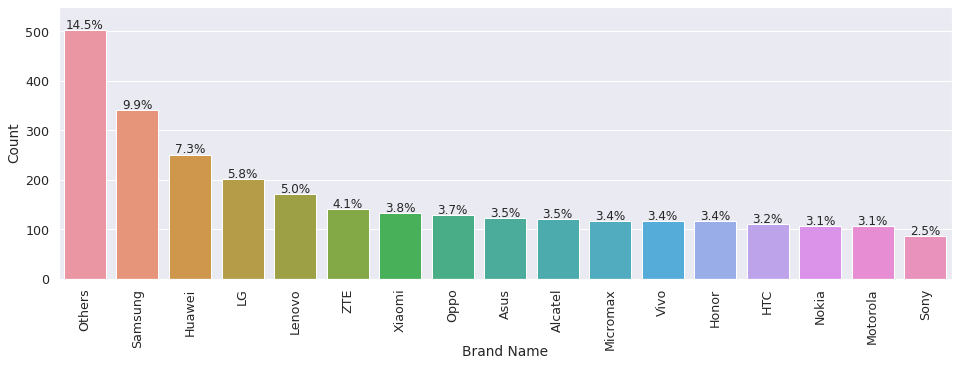

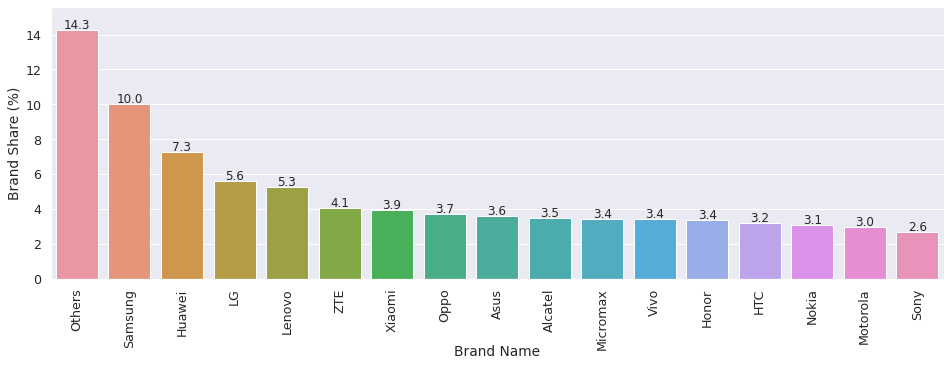

In [60]:
# Finding the columns corresponding to the first and last brand appearing in the training set
for i, text in enumerate(X1_train.columns.tolist()):
  if 'brand' in text:
    first_brand = i
    last_brand = i + df_imputed.brand_name.nunique() - 1 
    break

# Building a series of the number of each brand in the training set
train_brands = X1_train.sum()[first_brand:last_brand].sort_values(ascending = False)/X1_train.shape[0]*100
train_brands.index = df['brand_name'].value_counts(ascending = False).index.tolist()[0:-1]

# Plotting the frequency of brand names in original data and training set
plt.figure(figsize = (16, 5));
cntplt = sns.countplot(data = df, x = 'brand_name', order = df['brand_name'].value_counts(ascending = False).index.tolist()[0:17]);
countplot_labeling(cntplt, df);
cntplt.xaxis.labelpad = -5
plt.xticks(rotation = 90);
plt.xlabel('Brand Name');
plt.ylabel('Count');
plt.ylim(0, 550);

plt.figure(figsize = (16, 5));
barplt = sns.barplot(x = train_brands.index.tolist(), y = train_brands.values, order = train_brands.index.tolist()[0:17]);
countplot_labeling(barplt, train_brands, perc = False);
barplt.xaxis.labelpad = -5
plt.xticks(rotation = 90);
plt.xlabel('Brand Name');
plt.ylabel('Brand Share (%)');
plt.ylim(0, 15.6);

#### Observations: 
The fact that the fraction of each brand has barely changed between the training set and original data shows that the randomization of the rows has been conducted properly, and that the training set is a very good representation of the original data.

In [61]:
# Building the linear regression model via the first approach
lin_model1 = (sm.OLS(y1_train, X1_train)).fit()
print(lin_model1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                           23:28:58   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [62]:
# Finding all 'brand_name' dummy variables with p-values < 0.05
brand_pvals = lin_model1.pvalues[first_brand:last_brand].copy()
print('All brand-based dummy variables with p-value < 0.05:', brand_pvals.loc[brand_pvals.values < 0.05].index.tolist())

All brand-based dummy variables with p-value < 0.05: []


#### Observations:

None of the dummy variables corresponding to 'brand_name' is statistically significant. (they all have p-value $\geq$ 0.05.) However this may change after removing multicollinearity, at this point this finding indicates that 'brand_name' is not a statistically significant parameter while building the linear regression model.

### Second Approach: Using 'brand_price' to Create Dummy Variables

In [63]:
# Dividing the imputed data into predictors and target
X2 = df_imputed.drop(columns = ['normalized_used_price', 'brand_name'], axis = 1)
y2 = df_imputed['normalized_used_price']

# Creating dummy variables out of categorical columns
X2 = pd.get_dummies(X2, columns = X2.select_dtypes(include = ['object', 'category']).columns.tolist(), drop_first = True)
# Adding the intercept to predictors
X2 = sm.add_constant(X2)

X2.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,brand_price_moderate,brand_price_high
0,1.000,14.500,13.000,5.000,64.000,3.000,3020.000,146.000,127,4.715,1,0,0,0,1,0,0,1
1,1.000,17.300,13.000,16.000,128.000,8.000,4300.000,213.000,325,5.519,1,0,0,0,1,1,0,1
2,1.000,16.690,13.000,8.000,128.000,8.000,4200.000,213.000,162,5.885,1,0,0,0,1,1,0,1
3,1.000,25.500,13.000,8.000,64.000,6.000,7250.000,480.000,345,5.631,1,0,0,0,1,1,0,1
4,1.000,15.320,13.000,8.000,64.000,3.000,5000.000,185.000,293,4.948,1,0,0,0,1,0,0,1


In [64]:
# Splitting predictors and target into training and testing sets using a 70:30 ratio 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, shuffle = True, random_state = 1)

# For compactness, only first three rows and first 10 columnns are shown
print('X_train:\n' + str(X2_train.iloc[0:3, 0:10]), end = '\n'*2)
print('X_test:\n' + str(X2_test.iloc[0:3, 0:10]), end = '\n'*2)
print('y_train:\n' + str(y2_train.iloc[0:3]), end = '\n'*2)
print('y_test:\n' + str(y2_test.iloc[0:3]))

X_train:
      const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
3026  1.000       10.290           8.000             0.300      16.000 4.000   
1525  1.000       15.340          13.000             5.000      32.000 4.000   
1128  1.000       12.700          13.000             5.000      32.000 4.000   

      battery  weight  days_used  normalized_new_price  
3026 1800.000 120.000        819                 4.796  
1525 4050.000 225.000        585                 5.435  
1128 2550.000 162.000        727                 5.138  

X_test:
     const  screen_size  main_camera_mp  selfie_camera_mp  int_memory   ram  \
866  1.000       15.240           8.000             2.000      16.000 4.000   
957  1.000       10.160           3.150             0.300     512.000 0.250   
280  1.000       15.390           8.000             8.000      32.000 2.000   

     battery  weight  days_used  normalized_new_price  
866 3000.000 206.000        632                 5.191  
957 

#### Notes:

Since the same rows as the first model have been chosen for training and testing sets (random_state = 1 in both), we can be assured that randomization has been done properly in the second approach too, and the training set is a good representation of the whole data.

In [65]:
# Building the linear model via the second approach
lin_model2 = (sm.OLS(y2_train, X2_train)).fit()
print(lin_model2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     750.3
Date:                   Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                           23:28:58   Log-Likelihood:                 99.178
No. Observations:                   2417   AIC:                            -162.4
Df Residuals:                       2399   BIC:                            -58.13
Df Model:                             17                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observations:

Both categories corresponding to brands' median price have very high p-values, i.e. they both are statistically insignificant, again confirming that brands do not significantly influence our regression model. 

### Checking the Performance of the Models

In [66]:
# Model 1's performance
M1_performance = model_performance(lin_model1, X1_train, X1_test, y1_train, y1_test)
M1_performance

,R2,Adj. R2,MAE,RMSE,MAPE Score (%)
Train,0.845,0.842,0.180,0.230,4.327
Test,0.842,0.835,0.185,0.238,4.502


In [67]:
# Model 2's performance
M2_performance = model_performance(lin_model2, X2_train, X2_test, y2_train, y2_test)
M2_performance

,R2,Adj. R2,MAE,RMSE,MAPE Score (%)
Train,0.842,0.841,0.182,0.232,4.377
Test,0.845,0.842,0.183,0.237,4.471


#### Observations:

*   The first model slightly outperforms the second model on the training set, while the second model yields slightly better results on the testing set.
*    Regardless, both models are very close to each other, and reveal that the influence of brands (or brands' median prices) are statistically insignificant.

We choose to proceed with the second model (to drop the brand names and work with the level of brand median prices), which has a slightly better performance on the testing set and has far fewer parameters, making its handling and modification more convenient.

## Checking Linear Regression Assumptions

Here, we first ensure that ***no multicollinearity*** exists in the model, and if it does, we will seek to treat it, which can lead to the development of a new model. In the next step, we will aim to remove parameters that do no show ***statistical significance***, which most likely will alter the model to some extent. We then examine the resulting model to verify the fulfillment of the following linear regression assumptions:

1. **Linearity of variables**

2. **Independence of error terms**

3. **Normality of error terms**

4. **No Heteroscedasticity**

If these assumptions aren't met, we will implement the necessary treatments.

### Treating Multicollinearity

We will calculate the variance inflation factor (VIF) for all predictors, and drop those with VIF > 5 one by one, until there is no predictor left whose VIF > 5. Note that we typically do not show the VIF of the intercept and dummy variables (unless we set drop_dummy_const = False in our in-house VIF calculator function), as VIF does not reveal much about them. The intercept is always 1, causing it to typically have a high VIF, and the values of dummy variables of the same category are determined according to each other, implying some sort of correlation among them. The only thing we test for constant and dummay variables is that their VIFs don't become NaN or inf.

In [68]:
# Checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining a function for calculating the VIF of all predictors
def vif_calculator(X_train, drop_dummy_const = True):
  '''This function returns the VIF for all predictors, if drop_dummy_const = False,
  and all predictors except intercept and dummy variables, if drop_dummy_const = True.'''
  
  VIF_results = pd.DataFrame({'Feature': X_train.columns.tolist()})

  for i in range(X_train.shape[1]):
    VIF_results.loc[i, 'VIF_values'] = variance_inflation_factor(X_train.values, i)
  
  const_dummy_indices = [0]  # Indices of intercept and dummy variables
  for i in range(VIF_results.shape[0]):
    if (('os_' in VIF_results.loc[i, 'Feature']) or ('_yes' in VIF_results.loc[i, 'Feature']) 
    or ('brand_price_' in VIF_results.loc[i, 'Feature']) or ('brand_name_' in VIF_results.loc[i, 'Feature'])):
      const_dummy_indices.append(i)

  if(drop_dummy_const == True):
    VIF_results = VIF_results.drop(index = const_dummy_indices, axis = 0).reset_index(drop = True)

  return VIF_results  

# Defining a function for dropping high-VIF columnss individually and checking the performance of the resulting model
def vif_treatment(VIF_results, X_train, y_train):
  '''This function separates columns with VIF > 5 and builds regression models by removing  
  the high-VIF columns individually, and returns a dataframe containing the performance 
  properties of each model.'''

  high_vif_cols = VIF_results[VIF_results['VIF_values'] > 5].Feature.tolist()
  vif_treatment_res = pd.DataFrame(columns = ['Dropped Col.', 'R2', 'Adj. R2', 'RMSE'])
  vif_treatment_res['Dropped Col.'] = high_vif_cols

  for i in range(len(high_vif_cols)):
    X_train_temp = X_train.drop(columns = high_vif_cols[i], axis = 1)
    model_temp = (sm.OLS(y_train, X_train_temp)).fit()
    rmse = np.sqrt(mean_squared_error(y_train, model_temp.predict(X_train_temp)))
    vif_treatment_res.iloc[i, 1:] = [model_temp.rsquared, model_temp.rsquared_adj, rmse]

  return vif_treatment_res

In [69]:
# Demonstrating the VIF of all predictors except dummy variables and constant
VIF_results2 = vif_calculator(X2_train)
VIF_results2

,Feature,VIF_values
0,screen_size,7.288
1,main_camera_mp,2.004
2,selfie_camera_mp,2.609
3,int_memory,1.289
4,ram,2.128
5,battery,3.862
6,weight,6.156
7,days_used,2.580
8,normalized_new_price,2.702
9,years_since_release,4.689


In [70]:
# Showing how dropping high-VIF columns influences the model
VIF_treatment_res2 = vif_treatment(VIF_results2, X2_train, y2_train)
VIF_treatment_res2

,Dropped Col.,R2,Adj. R2,RMSE
0,screen_size,0.838,0.837,0.235
1,weight,0.838,0.837,0.235


#### Observations:


*   Among all predictors (that aren't dummy variable or intercept), only 'screen_size' and 'weight' have VIF > 5. This is expected, because, as discussed previously, the two are correlated.
*   Dropping either leads to the same performance metrics for the resulting model. We'll drop the 'screen_size' column, which shows a larger VIF.

Before moving forward, let's ensure that none of the VIFs for constant and dummy variables is NaN or inf:

In [71]:
# Ensuring there is no NaN or inf VIF caused by dummy variables
vif_all_cols = vif_calculator(X2_train, drop_dummy_const = False)

print('No. of NaN VIFs:', vif_all_cols.VIF_values.isnull().sum())
print('No. of infinity VIFs:', vif_all_cols.loc[vif_all_cols.VIF_values == np.inf].shape[0])

No. of NaN VIFs: 0
No. of infinity VIFs: 0


In [72]:
# Building a new model by dropping the high-VIF column
high_vif_cols = ['screen_size']

X3_train = X2_train.drop(columns = high_vif_cols, axis = 1)
y3_train = y2_train.copy()

lin_model3 = (sm.OLS(y3_train, X3_train)).fit()
print(lin_model3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     774.7
Date:                   Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                           23:28:59   Log-Likelihood:                 69.782
No. Observations:                   2417   AIC:                            -105.6
Df Residuals:                       2400   BIC:                            -7.128
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [73]:
# Evaluating the VIFs for the new model
VIF_results3 = vif_calculator(X3_train)
VIF_results3

,Feature,VIF_values
0,main_camera_mp,2.000
1,selfie_camera_mp,2.606
2,int_memory,1.288
3,ram,2.128
4,battery,3.629
5,weight,2.881
6,days_used,2.569
7,normalized_new_price,2.674
8,years_since_release,4.530


In [74]:
# Ensuring there is no NaN or inf VIF caused by dummy variables
vif_all_cols = vif_calculator(X3_train, drop_dummy_const = False)

print('No. of NaN VIFs:', vif_all_cols.VIF_values.isnull().sum())
print('No. of infinity VIFs:', vif_all_cols.loc[vif_all_cols.VIF_values == np.inf].shape[0])

No. of NaN VIFs: 0
No. of infinity VIFs: 0


#### Observations:

There is no infinity or NaN values in VIFs, and no further multicollinearity is detected! We also notice that $R^2$ and the adjusted $R^2$ of the new model have declined by only 0.0039 and 0.0038 compared to model 2, respectively. 

### Checking for Statistically Insignificant Predictors

We first double-check the p-values of the dummy variables of brand median price. If they all are still $\geq$ 0.05, we'll drop them all at once. This is premissible for dummy variables of the same category. We then take a second look at p-values, and if there is no category for which all p-values are $\geq$ 0.05, we proceed to drop the statistically insignificant predictors one by one, from the one with largest p-value to the one with the smallest p-value, until there is no statistically insignificant predictor left. We note that checking p-values is equivalent to conducting the following hypothesis testing for the coefficients of all independent variables:

- $H_0$: The independent variable is not significant. 
- $H_a$: The independent variable is significant.

The level of significance for this test, as well as all other statistical tests in this project, is selected as $\alpha = 0.05$.

In [75]:
# Defining a function that returns all statistically insignificant predictors
def remove_highp_features(model, X_train, y_train):
  '''This function goes through all indeopendent variables whose p-value >= 0.05, and
  drop them one by one from the largest to the smallest, and re-evaluate p-values at
  each step to see whether any variable with p-value >= 0.05 is left or not. At the end
  it returns all predictors that are statistically insignificant, and must be dropped,
  to achieve a model wherein no parameter has a p-value >= 0.05.'''

  X_train_new = X_train.copy()
  cols_to_drop = []
  p_values = model.pvalues
  while(p_values.max() > 0.05):
    pmax_col = p_values.idxmax()
    X_train_new = X_train_new.drop(columns = pmax_col, axis = 1)
    model_new = (sm.OLS(y_train, X_train_new)).fit()
    p_values = model_new.pvalues
    cols_to_drop.append(pmax_col)

  return cols_to_drop

#### Notes:

As can be seen in the summary of model 3, the p-value for both 'brand_price_moderate' and 'brand_price_moderate' is significantly greater than 0.05, implying that the category of 'brand_price' is statistically insignificant in our regression-based modeling, and can be fully dropped.

In [76]:
# Making a list of all columns corresponding to brand price
brand_cols = ['brand_price_moderate', 'brand_price_high']

# Building a new model after dropping brand columns
X4_train = X3_train.drop(columns = brand_cols, axis = 1)
y4_train = y3_train.copy()

lin_model4 = (sm.OLS(y4_train, X4_train)).fit()
print(lin_model4.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.838
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     886.0
Date:                   Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                           23:28:59   Log-Likelihood:                 69.616
No. Observations:                   2417   AIC:                            -109.2
Df Residuals:                       2402   BIC:                            -22.38
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observations:

* As a result of dropping all brand-related variables, $R^2$ and the adjusted $R^2$ of the new model have not decreased with respect to model 3. 

* After removal of the 'brand_price' category, we still see that the p-values for six predictors are still $\geq$ 0.05. We leverage the in-house function remove_highp_features(), which automates the process of one-by-one detection and removal of predictors with p-value ≥ 0.05.

In [77]:
# Finding the columns to be dropped to attain a model with no p-values >= 0.05
highp_cols = remove_highp_features(lin_model4, X4_train, y4_train)
highp_cols

['battery', 'os_Windows', 'days_used', 'int_memory', 'os_iOS', '5g_yes']

#### Observations:

* According to the remove_highp_features() function, all six independent variables in model 4 with p-values $\geq$ 0.05 should be dropped to attain a model with no statistically insignificant predictors.

* We remark that dropping the statistically insignifcant variables in the OS category ('os_Windows' and 'os_iOs') one by one, before passing the model to remove_highp_features(), would've led to the same result and the removal of the same six predictors to obtain a model with no statistically insignifact predictors. We in fact tested this, but do not show the steps for the sake of brevity.
* Thankfully 'days_used' was selected as a predictor to be dropped due to its high p-value. Independent of that, it would've been a good practice to remove this variable, because it presents roughly the same information as 'years_since_release', and it's highly correlated with it. Check out the positive coefficient of this variable in models 2, 3 and 4, implying that the older and more used a device gets, it becomes more expensive (!!), which doesn't make any sense.

In [78]:
# Dropping high-p columns to attain a new regression model
X5_train = X4_train.drop(columns = highp_cols, axis = 1)
y5_train = y4_train.copy()

lin_model5 = (sm.OLS(y5_train, X5_train)).fit()
print(lin_model5.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.837
Model:                               OLS   Adj. R-squared:                  0.837
Method:                    Least Squares   F-statistic:                     1547.
Date:                   Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                           23:28:59   Log-Likelihood:                 64.972
No. Observations:                   2417   AIC:                            -111.9
Df Residuals:                       2408   BIC:                            -59.83
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observations:

* As can be seen, model 5 doesn't have any statistically insignificant predictors.
* The removal of all high-p-value features has reduced $R^2$ and adjusted $R^2$ only by 0.0006 and 0.0001 with respect to model 3, respectively. 

### Checking out the Perfoemance of the Model after Removing All High-VIF and Statistically Insignificant Variables

In [79]:
# Rebuilding the testing set so that it suits model 5
removed_cols = high_vif_cols + highp_cols + brand_cols
X5_test = X2_test.drop(columns = removed_cols, axis = 1)
y5_test = y2_test.copy()

# Evaluating the performance of model 5
M5_performance = model_performance(lin_model5, X5_train, X5_test, y5_train, y5_test)
M5_performance

,R2,Adj. R2,MAE,RMSE,MAPE Score (%)
Train,0.837,0.837,0.184,0.236,4.434
Test,0.839,0.838,0.186,0.241,4.545


In [80]:
# Model 2's performance
M2_performance

,R2,Adj. R2,MAE,RMSE,MAPE Score (%)
Train,0.842,0.841,0.182,0.232,4.377
Test,0.845,0.842,0.183,0.237,4.471


#### Observations:

Despite all alterations and adjustments to the regression models, the performance of model 5 has barely changed compared to the initial point (model 2). Its RMSE and MAPE score for testing set have  increased by only 1.70% and 1.66%, respectively, and its $R^2$ and adjusted $R^2$ have declined only by 0.0045 and 0.0040. We'll analyze the performance metrics in more detail, when the model is finalized.

In [81]:
# Checking the VIF of predictors for model 5
VIF_results5 = vif_calculator(X5_train, drop_dummy_const = False)
VIF_results5

,Feature,VIF_values
0,const,93.351
1,main_camera_mp,1.879
2,selfie_camera_mp,2.464
3,ram,1.641
4,weight,1.257
5,normalized_new_price,2.332
6,years_since_release,2.505
7,os_Others,1.222
8,4g_yes,2.132


#### Observations:

As can be seen, despite all modifications applied to the regression model, the VIF for all predictors is still reliably smaller than 5.

### Linearity and Independence

The test for both assumptions, namely, the linearity of the relationship between the target and predictors and the independence of residuals (error terms) from each other is the same. The residuals should be plotted vs. the fitted values, and if no pattern is discernible in the figure, both assumptions are statisfied.

In [82]:
# Building a dataframe of training set, fitted values of the model and residuals
res_df = pd.DataFrame({'Truth': y5_train.values.flatten(), 'Fitted': lin_model5.fittedvalues.values, 
                       'Residuals': lin_model5.resid.values})
res_df.head()

,Truth,Fitted,Residuals
0,4.087,3.867,0.220
1,4.448,4.596,-0.147
2,4.315,4.289,0.027
3,4.282,4.188,0.094
4,4.456,4.496,-0.040


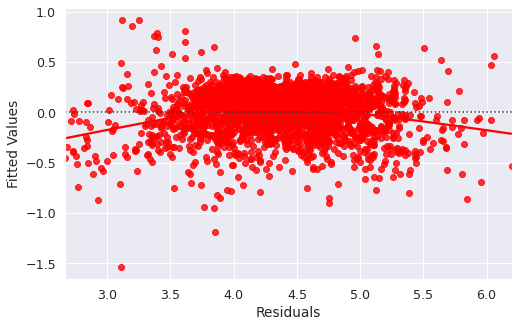

In [83]:
# Plotting the residauls vs. fitted values
plt.figure(figsize = (8, 5))
sns.residplot(data = res_df, x = 'Fitted', y = 'Residuals', lowess = True, color = 'red');
plt.xlabel('Residuals');
plt.ylabel('Fitted Values');

#### Observations:

No clear pattern can be detected from above scatter plot, implying that the relationship between $y$ and $X$ is nearly linear, and residuals are independent from each other.

### Normality of Distribution of Residuals

We test this assumption in three ways:

1.   Plotting the histogram and KDE (PDE) of residuals and compare them against a normal distribution with the same mean and variance.
2.   Generating a comparison Q-Q plot, which reveals how closely the residual distribution follows that of a normal distribution in different quantiles. The closer the result to a line with a 45-degree slope, the more accurately the normal distribution assumption has been satisfied.
3. Applying the Shapiro-Wilk statistical test for normality to residuals. 

All tests, especially the last one which is quite strict, may not be fully passed, but if all or some of them have been satisfied to an acceptable extent, we can assert that the residuals are almost normally distributed.   

 

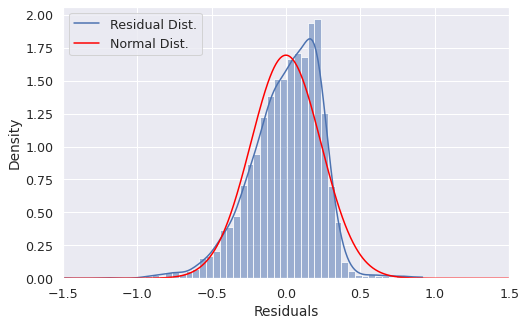

In [84]:
# Histogram test

# Generating a normal distribution with the same mean and variance as residuals
x_norm_dist = np.linspace(-1.5, 1.5, 1000)
norm_dist = stats.norm.pdf(x = x_norm_dist, loc = res_df['Residuals'].mean(), 
                           scale = res_df['Residuals'].std(ddof = 1))

# Plotting the distribution of residuals vs. the ideal normal distribution
plt.figure(figsize = (8, 5))
sns.histplot(data = res_df, x = 'Residuals', kde = True, stat = 'density');
plt.plot(x_norm_dist, norm_dist, color = 'red');
plt.legend(['Residual Dist.', 'Normal Dist.'], loc = 'upper left');
plt.xlim(-1.5, 1.5);

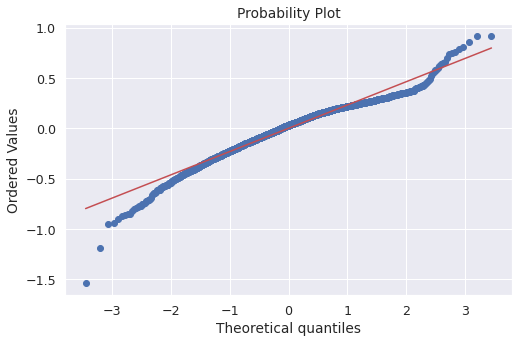

In [85]:
# Q-Q comparison plot
plt.figure(figsize = (8, 5))
import pylab
stats.probplot(res_df['Residuals'], dist = 'norm', plot = pylab);

#### Shapiro-Wilk test

The null and alternative hypotheses of this test are

* $H_0$: Residuals are normally distributed.
* $H_a$: Residuals are NOT normally distributed.

In [86]:
# Shapiro test
test_stat, p_val = stats.shapiro(res_df['Residuals'])

print('Test statistic =', round(test_stat, 3))
print('p-value =', round(p_val, 24))

Test statistic = 0.967
p-value = 3.3e-23


#### Observations:

However the Shapiro-Wilk test renders that, strictly speaking, the distribution of residuals isn't normal, the histogram and Q-Q plots suggest that, with a good approximation, the residuals can be assumed normally distributed, especially when the values aren't several standard deviations away from the mean.   

### Homoscedasticity

*Homoscedasticity* states that the variance of residuals doesn't vary significantly across the regression line. The failure of this assumption, also known as *heteroscedasticity*, is usually caused when too many outliers are present in the data, or when the relationship between the dependent and independent variables is stronly nonlinear. 

The best method to check for homoscedasticity is the Goldfeld-Quandt test. The null and alternate hypotheses of this statistical test are

* $H_0$: Residuals are homoscedastic.
* $H_a$: Residuals are heteroscedastic.

If homoscedasticity isn't satisfied, the predictors may need to be transformed, i.e. they may need to be squared, cubed, their exponential or logarithm might be taken, etc., or outlier treatment may need to be performed. 

In [87]:
# Goldfeld-Quandt test
test_res = sms.het_goldfeldquandt(res_df['Residuals'], X5_train.values)  # test results
test_stat = test_res[0]
p_val = test_res[1]

print('F-statistic =', round(test_stat, 3))
print('p-value =', round(p_val, 3))

F-statistic = 1.03
p-value = 0.304


#### Observations:

The p-value is safely greater than 0.05, therefore we fail to reject the null hypothesis and, consequently, the residuals can be assumed homoscedastic with a reasonable accuracy.

## Final Model

The test for linearity of the relationship between $y$ and $X$ as well as those for the independence, normality and homoscedasticity of residuals all passed with good approximations, and didn't necessitate making any changes to the regression model. Furthermore, model 5 revealed no predictors with VIF > 5 or p-value $\geq$ 0.05. Therefore, we takel model 5 as the final model.

In [88]:
# Defining a rounding function that shows n digits after decimal point, ignoring the zeros
# This will be helpful when prining the equation of the final model

def my_round(x, n = 3):
  '''This rounding function rounds the input to n numbers after all the zeros 
  to the right of decimal point.'''
  
  i = -1
  cnt = 0
  while(abs(x) < 10**i):
    cnt += 1
    i -= 1

  return round(x, n+cnt)

In [89]:
# Building the final model
X_train_final = X5_train.copy()
X_test_final = X5_test.copy()
y_train_final = y5_train.copy()
y_test_final = y5_test.copy()

lin_model_final = (sm.OLS(y_train_final, X_train_final)).fit()

In [90]:
# Printing the equation of the final model

print('normalized_used_price = ', end = '')
for i, text in enumerate(X_train_final.columns.tolist()):
  if text == 'const':
    print(str(my_round(lin_model_final.params[i])), end = ' + ')
  elif text == X_train_final.columns.tolist()[-1]:  
        print('('+str(my_round(lin_model_final.params[i])) + ')*' + text, end = '\n')
  else:
    print('('+str(my_round(lin_model_final.params[i])) + ')*' + text, end = ' + ')
  
  if(i%4 == 0 and i > 0):
    print('\n' + ' '*20, end = '')

normalized_used_price = 1.568 + (0.0219)*main_camera_mp + (0.0145)*selfie_camera_mp + (0.0167)*ram + (0.00167)*weight + 
                    (0.427)*normalized_new_price + (-0.0279)*years_since_release + (-0.145)*os_Others + (0.0472)*4g_yes

                    

In [91]:
# Evaluating the performance of the final model
M_final_performance = model_performance(lin_model_final, X_train_final, X_test_final, y_train_final, y_test_final)
M_final_performance

,R2,Adj. R2,MAE,RMSE,MAPE Score (%)
Train,0.837,0.837,0.184,0.236,4.434
Test,0.839,0.838,0.186,0.241,4.545


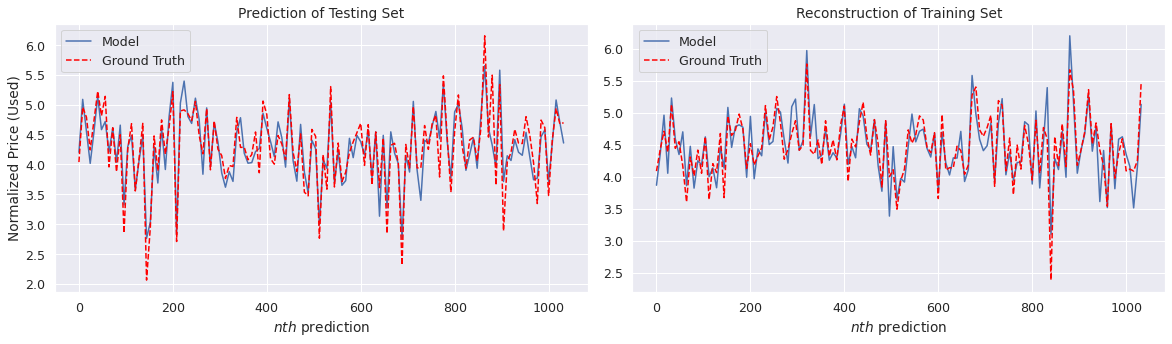

In [92]:
# Making a forecast for testing set using the final model
y_pred_final = lin_model_final.predict(X_test_final)
n_test = X_test_final.shape[0] # size of testing set

# Plotting the prediction of testing set by the final model
plt.figure(figsize = (16.5, 5))
plt.subplot(121)
plt.plot(np.arange(0, n_test, 8), y_pred_final[0:n_test:8]);
plt.plot(np.arange(0, n_test, 8), y_test_final[0:n_test:8], linestyle = '--', color = 'red');
plt.title('Prediction of Testing Set')
plt.xlabel('$nth$ prediction');
plt.ylabel('Normalized Price (Used)');
plt.legend(['Model', 'Ground Truth'], loc = 'upper left')

# Plotting the reconstrunction of training set by the final model
plt.subplot(122)
plt.plot(np.arange(0, n_test, 8), lin_model_final.fittedvalues[0:n_test:8]);
plt.plot(np.arange(0, n_test, 8), y_train_final[0:n_test:8], linestyle = '--', color = 'red');
plt.title('Reconstruction of Training Set')
plt.xlabel('$nth$ prediction');
plt.ylabel('');
plt.legend(['Model', 'Ground Truth'], loc = 'upper left')
plt.tight_layout()

#### Observations:

* The performance metrics of the final model are overall quite high. $R^2$ and adjusted $R^2$ $\approx$ 0.84 and MAPE score < 5% barely appear in linear regression models. The former shows that ~84% of variations in the target variable for both testing and training sets have been explained by the final model, and the latter shows the difference between the ground truth and predictions is on average less than 5%. 

* The performance metrics for both training and testing sets are remarkably close to each other, and for a few, those of the testing set are even better, substantiating the robustness of the final model and its applicability to unseen data. 

* We've also plotted the forecast made for testing set and the reconstruction of the training set by the final model, and in both cases, the model results agree very closely with the actual data. Note that for the sake of better visualization, only one-eighth of data has been shown.

## Actionable Insights and Recommendations 

***General properties of the model:***

* Close to 85% of variations in both training and testing sets can be explained by the final model, the model's average prediction error for testing set is less than 5%, and it doesn't have any statistically insignificant predictors. These suggest that the model can be used for forecasting of unseen datasets as well as making inferences and business recommendations.   

* The closeness of model's peformance on training and testing sets indicates that it doesn't suffer from overfitting.

* Although we started with 15 independent variables, several variables were dropped thanks to multicollinearity and statistical inference considerations, helping us develop a neat and compact model with only 8 predictors.

***Statistical inference:***

* The price of an equivalent new device appears to be the most significant parameter in determining the price of a used price. A unit increase in this variable will drive up the price of a used device by almost 0.43 unit. 

* A better RAM improves the processing power and speed of a device, so naturally it increases its price as well. According to our model, for each GB the price of a used device increases by 0.0167 unit.

* The resolution of cameras naturally raises the price of a used device. For each MP increase in the quality of main and selfie cameras the price goes up by 0.0219 and 0.0145 unit, respectively, so the quality of the main camera is seemingly a bit more important for pricing. 

* As a device gets larger, its price increases as well. For each gram, the price of a device grows by 0.00167 unit.

* Predictably, older devices are less expensive. With every single year in its release year, the price of a used device drops by 0.0279 unit.

* However operating system in general isn't a very substantial factor in pricing, but if a device's OS is categorized as 'Others', the model predicts that its price on average will be 0.145 unit cheaper. This can be attributed to the fact that devices with OS as 'Others' are on average much cheaper than devices with other OS categories. The pricing of devices based on OS is shown in Appendix.

* As expected, the availability of 4G technology on a device makes it (~ 0.05 unit) more expensive.

* 5G category didn't turn out to be a significant predictor. One reason might be that only a small fraction of devices in the bunch support this capability. As this technology becomes more trendy, it can certainly become a significant and relevant parameter for price prediction. 

* Features such as battery, ROM, days a device has been used for, etc. didn't turn out to be very significant for pricing, or their influence was covered by other correlated variables. 

***Recommendations for a future ML-based modeling:***

* Gattering a larger initial dataset might help developing an even more accurate model with higher performance metrics, that satisfies the linear regression assumptions (especially the one about the normality of residuals) more closely. 

* Additional features in original dataset might help derive an even more robust, dynamic and accurate ML-based model. For instance, the speed of charging could've been specified or the tablets and cell phones could've been separated from each other.

* There were many ways to engineer new features, but since the developed model is quite skillful and we didn't want to make the project too tedious, only some were attempted. For instance, 4G and 5G columns could bee reduced to one feature called Cellular Network with its categories including 4G & 5G, only 4G and both 4G & 5G, or main and selfie camera columns could bee merged to generate a single camera resolution feature. These can be attempted by another ML engineer to see whether they improve the model in any ways or not. 

* The variables in the pair ('days_used', 'years_since_relase' (age)) and ('weight', 'screen_size') reveal pretty much the same amount of information for a device as each other and, for this reason, they are strongly correlated with each other. Therefore, if the space and size of the original data is a concern, only one variable in each pair can be kept without reducing the accuracy and robustness of the model. 

___

## Appendix: The Influence of OS on Pricing

**`Used Price vs. OS`**

The average price of used devices categorized by their operating system:
Others    3.307
Windows   4.155
Android   4.408
iOS       4.957
Name: normalized_used_price, dtype: float64


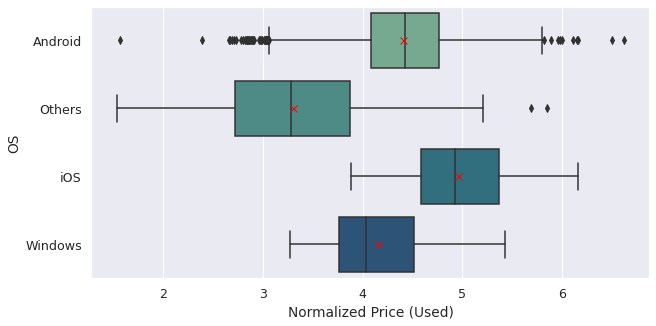

In [93]:
# Printing the mean price based on OS
os_price = df_imputed.groupby('os').normalized_used_price.mean().sort_values()
os_price.index.name = None
print('The average price of used devices categorized by their operating system:')
print(os_price)

# Plotting the boxplot of used price categorized by OS
plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = 'normalized_used_price', y = 'os', showmeans = True, palette = 'crest',
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Normalized Price (Used)');
plt.ylabel('OS');